1.0


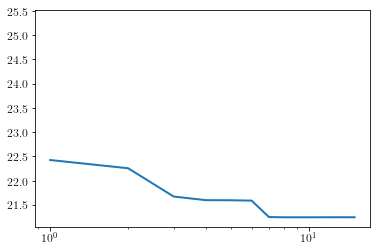

In [887]:
import model_tools
#reload(model_tools)
import numpy as np
import matplotlib.pyplot as plt
import utilities as utils

onecol = 3.42
onep5 = 4.5
twocol = 7

def rect(X):
    return (X + np.abs(X))/2
def resp(X):
    return np.sqrt(rect(X[0])**2 + rect(X[1])**2)


plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True

dir = "./model_files/model_file_16/"

data = model_tools.get_model_data(dir)
print(data["params"]["walk_dt"])
plt.semilogx([-x[1] for x in data["log"]])
plt.show()



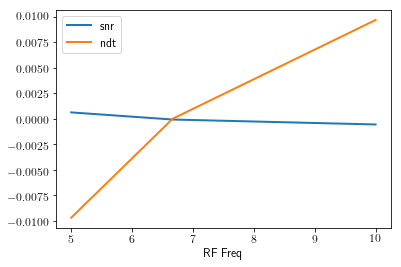

0.368880145842
0.37606448669


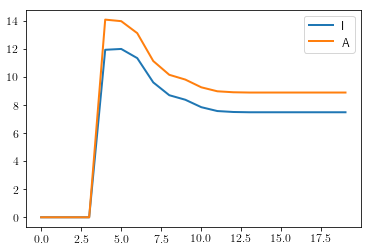

In [26]:
I=utils.fetch_file("./model_files/model_file_26/new_PIAresponses_0.5_10_1.0_size_tuning_0.5.pkl")[0]
A=utils.fetch_file("./model_files/model_file_26/new_PIAresponses_0.5_10_1.0_size_tuning_0.05.pkl")[0]
#A=utils.fetch_file("./model_files/model_file_26/new_PIAresponses_0.5_10_1.0_ori_tuning_0.05.pkl")[0]

i = resp(I.transpose())
a = resp(A.transpose())

print(SI(a))
print(SI(i))

plt.plot(i,label = "I")
plt.plot(a,label = "A")
plt.legend()
plt.show()

0.376524978324
0.133861455903


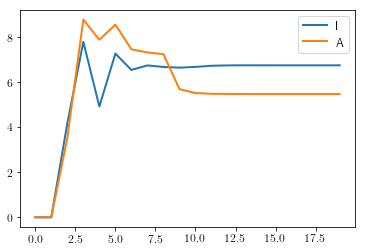

In [32]:
I=utils.fetch_file("./model_files/MGSM_model_file_3/new_PIAresponses_0.5_5_1.0_size_tuning_0.1.pkl")[0]
A=utils.fetch_file("./model_files/MGSM_model_file_3/new_PIAresponses_0.5_10_1.0_size_tuning_0.05.pkl")[0]
#A=utils.fetch_file("./model_files/model_file_26/new_PIAresponses_0.5_10_1.0_ori_tuning_0.05.pkl")[0]

i = resp(I.transpose())
a = resp(A.transpose())

print(SI(a))
print(SI(i))

plt.plot(i,label = "I")
plt.plot(a,label = "A")
plt.legend()
plt.show()

In [2]:
print(data.keys())
print(data["params"].keys())
print(data["params"]["walk_dt"])

['Q', 'paths', 'C', 'params', 'log', 'P', 'kernels', 'fac', 'F', 'segs']
[u'wavelengths', u'fq_shared', u'n_image', u'walk_decay_frac', u'em_steps', u'filter_position', u'stochastic_buffer', u'minibatch_size', u'walk_length', u'total_size', u'f_ID', u'segmentation', u'n_grad_steps', u'learning_rate', u'n_surrounds', u'npaths', u'filter_distance', u'walk_std', u'walk_dt', u'elongation', u'n_angles', u'seed']
1.0


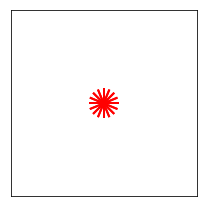

120


In [3]:
import model_tools as tools
par = data["params"]
f_pos = np.array(tools.get_f_pos(data["params"]["filter_position"],data["params"]["filter_distance"],data["params"]["n_surrounds"]))

indices = np.concatenate([[[a,b,c] for a in range(par["n_angles"]) for b in range(len(par["wavelengths"])) for c in range(2)] for p in f_pos])
positions = np.concatenate([[p for a in range(par["n_angles"]) for b in range(len(par["wavelengths"])) for c in range(2)] for p in f_pos])

fig,sub = plt.subplots(1,1,figsize = (onecol,onecol))

#sub.plot(f_pos[:,0],f_pos[:,1],".",markersize=15)
for k in range(len(positions)):
    aa = (np.linspace(0,np.pi,par["n_angles"]+1)[:-1])[indices[k][0]]
    v = np.array([[-.3*np.cos(aa),.3*np.sin(aa)],[.3*np.cos(aa),-.3*np.sin(aa)]])
#    v = np.array([[-.1,0],[0,.1]])
    p = np.array(positions[k])
    p1 = np.array([(p+v[0])[0],(p+v[1])[0]])
    p2 = np.array([(p+v[0])[1],(p+v[1])[1]])
    
    if k in data["segs"][0][0]:
        sub.plot(p1,p2,"r",linewidth=2)
    else:
        sub.plot(p1,p2,"k",linewidth=2)

sub.set_yticks([])
sub.set_xticks([])
sub.set_xlim([-2,2])
sub.set_ylim([-2,2])
sub.set_aspect(1)
plt.savefig("./att_MGSM_Figures/Filter_Position.pdf")
plt.show()
print(15*8)


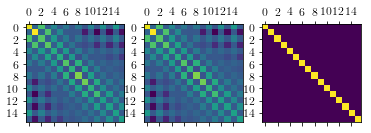

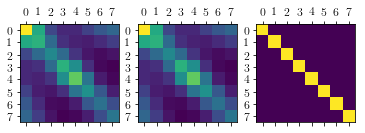

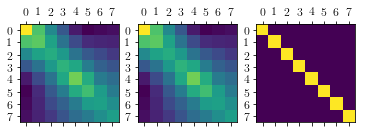

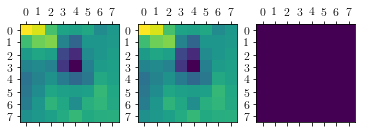

In [33]:
fig,sub = plt.subplots(1,3)

s = 0

sub[0].matshow(data["C"][s][0])
sub[1].matshow(data["Q"][s][0])
sub[2].matshow(data["F"][s][0])
plt.show()

fig,sub = plt.subplots(1,3)
sub[0].matshow(data["C"][s][0][::2,::2])
sub[1].matshow(data["Q"][s][0][::2,::2])
sub[2].matshow(data["F"][s][0][::2,::2])
plt.show()

fig,sub = plt.subplots(1,3)
sub[0].matshow(data["C"][s][0][1::2,1::2])
sub[1].matshow(data["Q"][s][0][1::2,1::2])
sub[2].matshow(data["F"][s][0][1::2,1::2])
plt.show()

fig,sub = plt.subplots(1,3)
sub[0].matshow(data["C"][s][0][1::2,::2])
sub[1].matshow(data["Q"][s][0][1::2,::2])
sub[2].matshow(data["F"][s][0][1::2,::2])
plt.show()

0.172797346017


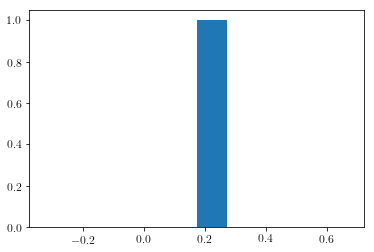

dt = 1.0


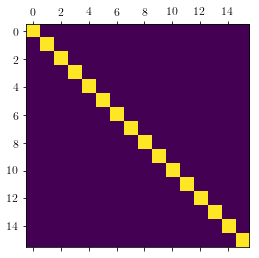

0.83898405443


In [37]:
import scipy.linalg as linalg

ff = data["F"]
print(ff[0][0][0,0])
plt.hist([j[0,0] for i in ff for j in i])
plt.show()
dt = data["params"]["walk_dt"]
eps = linalg.logm(data["F"][0][0])/dt

print("dt = {}".format(data["params"]["walk_dt"]))
T = .1
plt.matshow(linalg.expm(T * eps))
#plt.matshow(data["F"][3][0])
plt.show()
print(np.max(linalg.expm(T * eps)))


In [ ]:
s = 0
z = 0
fig,sub = plt.subplots(1,2)
ctrans = data["Q"][s][z] + np.dot(np.transpose(data["F"][s][z]),np.dot(data["C"][s][z],data["F"][s][z]))
cstab = data["Q"][s][z] + np.linalg.inv(np.eye(len(data["F"][s][z])) + np.dot(np.transpose(data["F"][s][z]),data["F"][s][z]))
print(np.mean(np.abs(np.reshape(ctrans - data["C"][s][z],[-1]))))
sub[0].hist(np.reshape(data["C"][s][z],[-1]))
sub[1].hist(np.reshape((np.dot(cstab,data["F"][s][z]) - np.dot(data["F"][s][z],cstab))/cstab,[-1]))
sub[1].set_xlim([-10,10])
sub[1].set_aspect(.1)
plt.tight_layout()
plt.show()

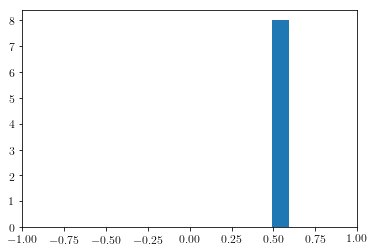

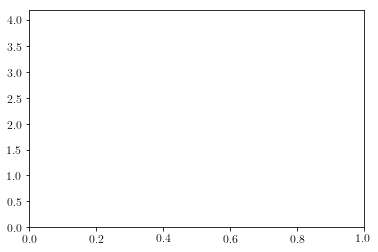

In [1483]:
plt.hist(np.diag(data["F"][0][0]))
plt.xlim([-1,1])
plt.show()

plt.hist(np.diag(data["Q"][0][0])/np.diag(data["C"][0][0]))
plt.xlim([0,1])
plt.show()

In [1422]:
data["kernels"].shape

(8, 1, 2, 60, 60)

In [24]:
def roll90(xx):
    r = np.roll(xx,(len(xx))/2)
    return r
def ID(s):
    return s

def rect(x):
    return (x + np.abs(x))/2

def odep_rgain_m_s(A,n):
    out = []
        
    for k in range(n):
        o,t = par(A.shape[2])

        m1 = np.mean(A[:,-3,o,0],axis = 1)
        m2 = np.mean(A[:,-1,o,0],axis = 1)
        out.append(np.mean(m2/m1,-1))

    print(np.array(out).shape)
    return np.mean(np.array(out),axis = 0),np.std(np.array(out),axis = 0)
#(4, 100, 1, 20)
def SI(x):
    return 1. - (x[-1]/np.max(x))

def SI_m_s(A,n):
    out = []
        
    for k in range(n):
        o,t = par(A.shape[1])

        m1 = [SI(a) for a in np.mean(A[:,o,0],axis = 1)]
        out.append(m1)

    print(np.array(out).shape)
    return np.mean(np.array(out),axis = 0),np.std(np.array(out),axis = 0)

def par(v):
    a = np.arange(v)
    np.random.shuffle(a)
    return a[:len(a)/2],a[len(a)/2:]



Next we will plot the orientation tuning for non trial-averages responses.

(4, 4, 4, 1, 20, 2)
(4, 4, 4, 1, 20, 16, 16)


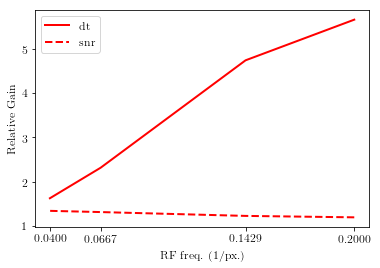

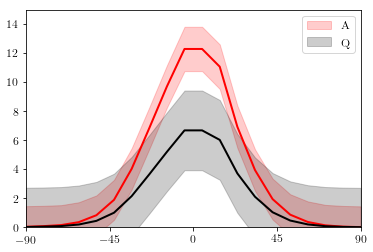

In [574]:
#snr = ["0.1","0.5","1.0"]


DD = "./model_files/model_file_"
DN = ["16","20","18","17"]
#DN = ["16","18","17"]
fpar = [model_tools.get_model_data(DD + d + "/") for d in DN]
W = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]

nf = ["2","5","10","20"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = np.array([[[np.array(utils.fetch_file(DD + m + "/responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
ORIV = np.array([[[np.array(utils.fetch_file(DD + m + "/variance_responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
print(ORI.shape)
print(ORIV.shape)
r = np.sqrt(rect(ORI[:,:,:,:,:,0])**2  + rect(ORI[:,:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,:,0,0] + ORIV[:,:,:,:,:,1,1])
tar = np.mean(r,axis = (3)) 
star = np.mean(vr,axis = (3)) 
MAX = tar[:,:,:,0]

colors = ["r","g","b","y"]

#for k in range(4):
#    plt.plot(W,MAX[:,k,-1]/MAX[:,k,1],color=colors[k],label = "dt" if k == 0 else "")

plt.plot(W,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 1),color="r",label = "dt")
plt.plot(W,np.mean(MAX[:,-1]/MAX[:,0],axis = 1),"--",color="r",label = "snr")

#for k in range(4):
#    plt.plot(W,np.transpose(MAX[k,:,-1]/MAX[k,:,1]),"--",color=colors[k],label = "snr" if k == 0 else "")
plt.legend()
plt.xticks(W)
plt.xlabel("RF freq. (1/px.)")
plt.ylabel("Relative Gain")
plt.show()

plt.plot(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,-1]),color = "r")
plt.fill_between(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,-1] - star[2,0,-1]),roll90(tar[2,0,-1] + star[2,0,-1]),alpha = .2,color = "r",label = "A")

plt.plot(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,0]),color = "k")
plt.fill_between(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,0] - star[2,0,0]),roll90(tar[2,0,0] + star[2,0,0]),alpha = .2,color = "k",label = "Q")
plt.legend()
plt.ylim([0,15])
plt.xlim([-90,90])
plt.xticks([-90,-45,0,45,90])
plt.show()

#snr = ["0.1","0.5","1.0"]

(4, 4, 4, 1, 20, 2)
(4, 4, 4, 1, 20, 16, 16)


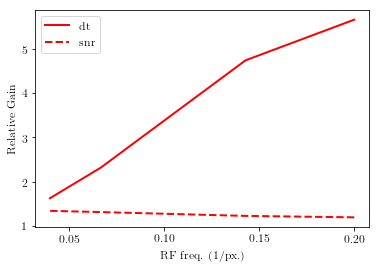

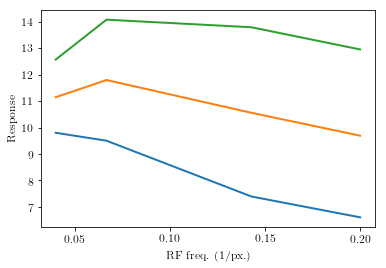

In [628]:

DD = "./model_files/model_file_"
DN = ["16","20","18","17"]
#DN = ["16","18","17"]
fpar = [model_tools.get_model_data(DD + d + "/") for d in DN]
Wrf = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]

nf = ["2","5","10","20"]
#nf = ["10","15","20","40"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = np.array([[[np.array(utils.fetch_file(DD + m + "/responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
ORIV = np.array([[[np.array(utils.fetch_file(DD + m + "/variance_responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
print(ORI.shape)
print(ORIV.shape)
r = np.sqrt(rect(ORI[:,:,:,:,:,0])**2  + rect(ORI[:,:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,:,0,0] + ORIV[:,:,:,:,:,1,1])
atar = np.mean(r,axis = (3))
astar = np.mean(vr,axis = (3))
MAX = atar[:,:,:,0]

colors = ["r","g","b","y"]

plt.plot(Wrf,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 1),color="r",label = "dt")
plt.plot(Wrf,np.mean(MAX[:,-1,:]/MAX[:,0,:],axis = 1),"--",color="r",label = "snr")
#plt.plot(Wrf,MAX[:,:,-1]/MAX[:,:,0],color="r",label = "dt")
#plt.plot(Wrf,MAX[:,-1,:]/MAX[:,0,:],"--",color="r",label = "snr")

#for k in range(4):
#    plt.plot(W,np.transpose(MAX[k,:,-1]/MAX[k,:,1]),"--",color=colors[k],label = "snr" if k == 0 else "")
plt.legend()
plt.xticks([.05,.1,.15,.2])
plt.xlabel("RF freq. (1/px.)")
plt.ylabel("Relative Gain")
plt.show()

plt.plot(Wrf,MAX[:,1,[1,2,3]])
#plt.plot(Wrf,MAX[:,1,:])

#for k in range(4):
#    plt.plot(W,np.transpose(MAX[k,:,-1]/MAX[k,:,1]),"--",color=colors[k],label = "snr" if k == 0 else "")
plt.legend()
plt.xticks([.05,.1,.15,.2])
plt.xlabel("RF freq. (1/px.)")
plt.ylabel("Response")
plt.show()

#plt.plot(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,-1]),color = "r")
#plt.fill_between(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,-1] - astar[2,0,-1]),roll90(atar[2,0,-1] + astar[2,0,-1]),alpha = .2,color = "r",label = "A")

#plt.plot(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,0]),color = "k")
#plt.fill_between(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,0] - astar[2,0,0]),roll90(tar[2,0,0] + astar[2,0,0]),alpha = .2,color = "k",label = "Q")
#plt.legend()
#plt.ylim([0,15])
#plt.xlim([-90,90])
#plt.xticks([-90,-45,0,45,90])
#plt.show()


In [153]:
#snr = ["0.1","0.5","1.0"]

DD = "./model_files/model_file_"
DN = ["16","20","18","17"]
#DN = ["16","18","17"]

fpar = [model_tools.get_model_data(DD + d + "/") for d in DN]
W = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]

nf = ["2","5","10","20"]
nf = ["10","15","20","40"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = np.array([[[np.array(utils.fetch_file(DD + m + "/TA_responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
ORIV = np.array([[[np.array(utils.fetch_file(DD + m + "/variance_TA_responses_1.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
print(ORI.shape)
print(ORIV.shape)
r = np.sqrt(rect(ORI[:,:,:,:,:,:,0])**2  + rect(ORI[:,:,:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,:,:,0,0] + ORIV[:,:,:,:,:,:,1,1])
print(r.shape)
tar = np.mean(r,axis = (3,4)) 
star = np.mean(vr,axis = (3,4)) 
MAX = tar[:,:,:,0]

colors = ["r","g","b","y"]

#for k in range(4):
#    plt.plot(W,MAX[:,k,-1]/MAX[:,k,1],color=colors[k],label = "dt" if k == 0 else "")

plt.plot(W,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 1),color="r",label = "dt")
plt.plot(W,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 0),"--",color="r",label = "snr")

#for k in range(4):
#    plt.plot(W,np.transpose(MAX[k,:,-1]/MAX[k,:,1]),"--",color=colors[k],label = "snr" if k == 0 else "")
plt.legend()
plt.xticks(W)
plt.xlabel("RF freq. (1/px.)")
plt.ylabel("Relative Gain")
plt.show()

plt.plot(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,2]),color = "k")
plt.fill_between(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,0,2] - star[2,0,2]),roll90(tar[2,0,2] + star[2,0,2]),alpha = .2,color = "k",label = "Q")

plt.plot(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,-1,2]),color = "r")
plt.fill_between(np.linspace(-90,90,tar.shape[3]),roll90(tar[2,-1,2] - star[2,-1,2]),roll90(tar[2,-1,2] + star[2,-1,2]),alpha = .2,color = "r",label = "A")
plt.legend()
plt.ylim([0,15])
plt.xlim([-90,90])
plt.xticks([-90,-45,0,45,90])
plt.show()

IOError: [Errno 2] No such file or directory: './model_files/model_file_16/TA_responses_1.0_10_0.5_ori_tuning_0.5.pkl'

(4, 5, 4, 50, 1, 20, 16, 16)
(4, 5, 4)


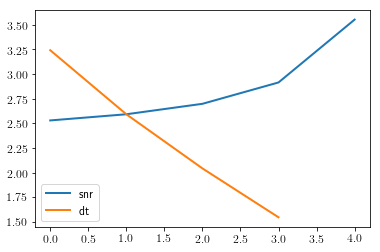

In [282]:
#snr = ["0.1","0.5","1.0"]

DD = "./model_files/model_file_"
DN = ["16","20","18","17"]
#DN = ["16","18","17"]
fpar = [model_tools.get_model_data(DD + d + "/") for d in DN]
W = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]


nf = ["2","5","10","20"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.1","0.5","0.75","1.0","2.0"]

ORI = np.array([[[np.array(utils.fetch_file(DD + m + "/TA_responses_0.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
ORIV = np.array([[[np.array(utils.fetch_file(DD + m + "/variance_TA_responses_0.0_{}_{}_ori_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr] for m in DN])
print(ORIV.shape)
r = np.sqrt(rect(ORI[:,:,:,:,:,:,0])**2  + rect(ORI[:,:,:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,:,0,0,0] + ORIV[:,:,:,:,:,0,1,1])
tar = np.mean(r,axis = (3,4)) 
star = np.mean(vr,axis = (3,4)) 
MAX = tar[:,:,:,0]
#print(vr)

colors = ["r","g","b","y"]
print(star.shape)
plt.plot(star[0,:,1],label = "snr")
plt.plot(star[0,1,:],label = "dt")
plt.legend()
plt.show()


(4, 4, 1, 20, 2)


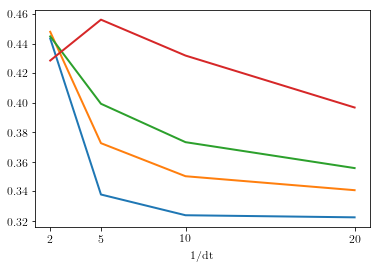

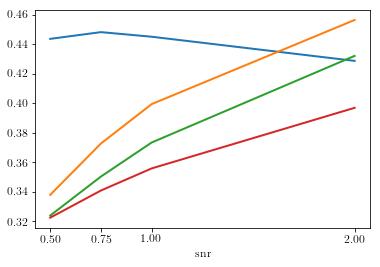

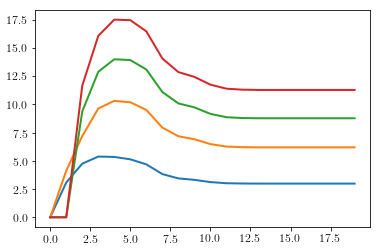

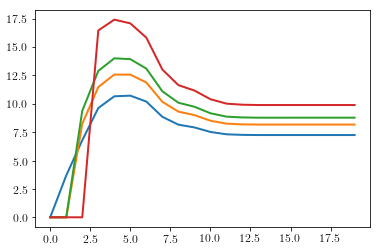

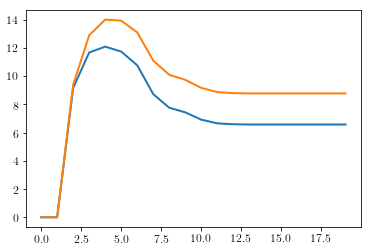

In [585]:

#snr = ["0.1","0.5","1.0"]

DD = "./model_files/model_file_26"
#DD = "./model_files/MGSM_model_file_3"

nf = ["2","5","10","20"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = np.array([[np.array(utils.fetch_file(DD + "/responses_1.0_{}_{}_size_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr])
ORIV = np.array([[np.array(utils.fetch_file(DD + "/variance_responses_1.0_{}_{}_size_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr])
print(ORI.shape)
r = np.sqrt(rect(ORI[:,:,:,:,0])**2  + rect(ORI[:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,0,0] + ORIV[:,:,:,:,1,1])
tar = np.mean(r,axis = (2)) 
star = np.mean(vr,axis = (2)) 

SIs = np.array([[SI(j) for j in k] for k in tar])

for k in SIs:
    plt.plot([1./float(x) for x in dt],k)
plt.xlabel("1/dt")
plt.xticks([1./float(x) for x in dt])
plt.show()

for k in range(SIs.shape[1]):
    plt.plot([float(x) for x in snr],SIs[:,k])
plt.xlabel("snr")
plt.xticks([float(x) for x in snr])
plt.show()

for k in range(len(dt)):
    plt.plot(tar[2,k])
plt.show()

for k in range(len(snr)):
    plt.plot(tar[k,2])
plt.show()


plt.plot(tar[-1,1])
plt.plot(tar[-2,2])
plt.show()

(4, 4, 1, 20, 2)
(4, 4, 1, 20, 56, 56)
(4, 4, 20)


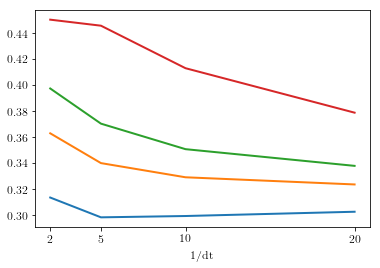

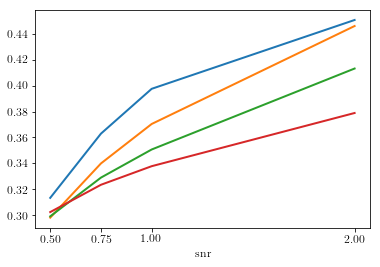

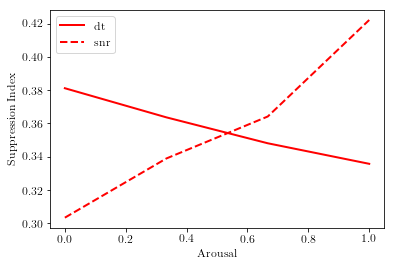

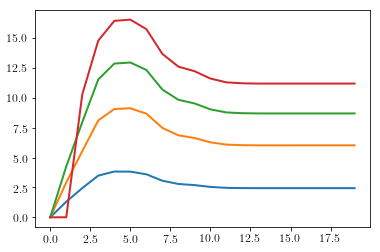

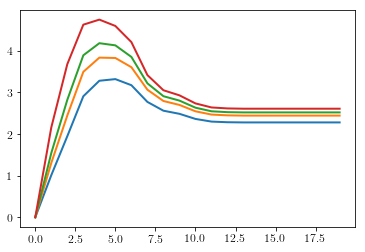

In [596]:
#snr = ["0.1","0.5","1.0"]

DD = "./model_files/model_file_26"
#DD = "./model_files/MGSM_model_file_3"

nf = ["2","5","10","20"]
nf = ["10","15","20","40"]

dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = np.array([[np.array(utils.fetch_file(DD + "/responses_1.0_{}_{}_size_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr])
ORIV = np.array([[np.array(utils.fetch_file(DD + "/variance_responses_1.0_{}_{}_size_tuning_{}.pkl".format(nf[k],ii,dt[k]))) for k in range(len(dt))] for ii in snr])
print(ORI.shape)
print(ORIV.shape)
#r = np.sqrt(rect(ORI[:,:,:,:,:,0])**2  + rect(ORI[:,:,:,:,:,1])**2)
r = np.sqrt(rect(ORI[:,:,:,:,0])**2  + rect(ORI[:,:,:,:,1])**2)
vr = np.sqrt(ORIV[:,:,:,:,0,0] + ORIV[:,:,:,:,1,1])
tar = np.mean(r,axis = (2)) 
star = np.mean(vr,axis = (2)) 
print(star.shape)
SIs = np.array([[SI(j) for j in k] for k in tar])

for k in SIs:
    plt.plot([1./float(x) for x in dt],k)
plt.xlabel("1/dt")
plt.xticks([1./float(x) for x in dt])
plt.show()

for k in range(SIs.shape[1]):
    plt.plot([float(x) for x in snr],SIs[:,k])
plt.xlabel("snr")
plt.xticks([float(x) for x in snr])
plt.show()

plt.plot(np.linspace(0,1,SIs.shape[1]),np.mean(SIs,axis = 0),label = "dt",color = "r")
plt.plot(np.linspace(0,1,SIs.shape[0]),np.mean(SIs,axis = 1),"--",label = "snr",color = "r")
plt.xlabel("Arousal")
plt.ylabel("Suppression Index")
plt.legend()
plt.show()

for k in range(len(dt)):
    plt.plot(tar[1,k])
plt.show()

for k in range(len(snr)):
    plt.plot(tar[k,0])
plt.show()

(4, 4, 1, 20, 2)
(4, 4, 20)
(4, 4, 20)


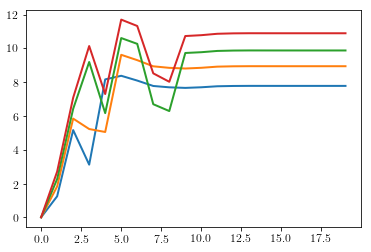

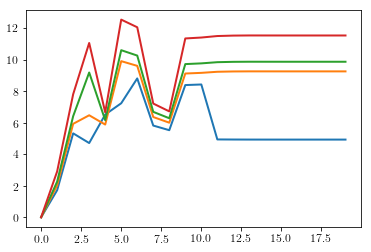

In [561]:
nf = ["3","6","11","21"]

dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

DD = "./model_files/MGSM_model_file_3/"

ORI = np.array([[np.array(utils.fetch_file(DD + "responses_1.0_{}_{}_size_tuning_{}.pkl".format(nf[j],ii,dt[j]))) for ii in snr] for j in range(len(dt))])
#ORIv = np.array([[np.array(utils.fetch_file(DD + "variance_TA_responses_0.5_20_{}_size_tuning_01.pkl".format(ii))) for ii in snr] for m in DN])
print(ORI.shape)
r = np.sqrt(rect(ORI[:,:,:,:,0])**2  + rect(ORI[:,:,:,:,1])**2)
r = np.mean(r,axis = (2))
#vr = np.sqrt(ORIv[:,:,:,:,:,0,0] + ORIv[:,:,:,:,:,1,1])
print(r.shape)
tar = r
#star = np.mean(vr,axis = (1,2)) 

print(tar.shape)
for k in range(tar.shape[0]):
    plt.plot(tar[k,2],label = "SNR = {}".format(snr[k]))

plt.show()

for k in range(tar.shape[1]):
    plt.plot(tar[2,k],label = "SNR = {}".format(snr[k]))

plt.show()

(11, 4, 20, 1, 3, 2)


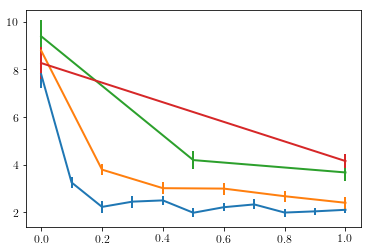

In [267]:
DD = "./model_files/model_file_18/"

dt = ["0.05","0.1","0.2","0.5"]
nf = ["20","10","5","2"]
snr = ["0.1","0.5","0.75","1.0"]

ar = [1./float(x) for x in dt]

ORI = [np.array([[utils.fetch_file(DD + "TA_responses_1.0_{}_{}_MI_grat_{}.pkl".format(str(x),snr[k],dt[i])) for k in range(len(snr))] for x in range(1,int(nf[i])+2,2)]) for i in range(4)]
ORIV = [np.array([[utils.fetch_file(DD + "variance_TA_responses_1.0_{}_{}_MI_grat_{}.pkl".format(str(x),snr[k],dt[i])) for k in range(len(snr))] for x in range(1,int(nf[i])+1,2)]) for i in range(4)]
print(ORI[0].shape)

rr = [np.sqrt(o[:,:,:,:,:,0]**2 + o[:,:,:,:,:,1]**2) for o in ORI]
rrm = [np.mean(i,axis = (2,3)) for i in rr]
rrs = [np.std(i,axis = (2,3))/np.sqrt(20) for i in rr]

for r in range(len(rrm)):
    plt.errorbar(np.linspace(0,1,len(rrm[r])),rrm[r][:,0,0],yerr = rrs[r][:,0,0])
    
plt.show()

In [130]:
#DD = "./model_files/model_file_26/"
DD = "./model_files/MGSM_model_file_3/"

dt = ["0.05","0.1","0.2","0.5"]
nf = ["20","10","5","2"]
snr = ["0.1","0.5","0.75","1.0"]

ar = [1./float(x) for x in dt]

ORI = np.array([[utils.fetch_file(DD + "responses_0.5_{}_{}_size_tuning_{}.pkl".format(nf[i],snr[k],dt[i])) for k in range(len(snr))] for i in range(4)])
#ORIv = np.array([[np.array(utils.fetch_file(DD + "variance_TA_responses_0.5_20_{}_size_tuning_01.pkl".format(ii))) for ii in snr] for m in DN])
print(ORI.shape)
r = np.sqrt(rect(ORI[:,:,:,:,0])**2  + rect(ORI[:,:,:,:,1])**2)
r = np.mean(r,axis = (2))
#vr = np.sqrt(ORIv[:,:,:,:,:,0,0] + ORIv[:,:,:,:,:,1,1])
print(r.shape)
tar = r
#star = np.mean(vr,axis = (1,2)) 

sires = np.transpose(np.array([[SI(x) for x in s] for s in tar]))
maxres = np.transpose(np.array([[np.max(x) for x in s] for s in tar]))
print(sires.shape)

for k in sires:
    plt.plot(ar,k)
plt.show()


for k in maxres:
    plt.plot(ar,k)
plt.show()

plt.plot(tar[0,1])
plt.plot(tar[-1,1])
plt.show()

IOError: [Errno 2] No such file or directory: './model_files/MGSM_model_file_3/responses_0.5_20_0.1_size_tuning_0.05.pkl'

In [51]:
for k in sires:
    plt.plot(k)
plt.show()
snf = ["7","10","14","28"]#,"28"]#,"14","28"]
sdt = ["1.0","0.75","0.5","0.25"]#,"0.25"]#,"0.5","0.25"]

dir3 = "./model_files/model_file_17/"
dir1 = "./model_files/model_file_16/"
dir2 = "./model_files/model_file_18/"
dirnew = "./model_files/model_file_20/"

ORIr = np.array([[np.array(utils.fetch_file(d + "TA_responses_0.5_{}_1.0_ori_tuning_{}.pkl".format(snf[k],sdt[k]))) for k in range(4)] for d in [dir1,dirnew,dir2,dir3]])

fullR = np.sqrt(rect(ORIr[:,:,:,:,:,0])**2 + rect(ORIr[:,:,:,:,:,1])**2)

fMAXm = np.mean(np.max(fullR,axis = 4),axis = (2,3))
fMAXs = np.std(np.max(fullR,axis = 4),axis = (2,3))

fGm,fGs = odep_rgain_m_s(fullR,100)

fRm = np.mean(fullR,axis = (2,3))
fRs = np.std(fullR,axis = (2,3))
fpar = [model_tools.get_model_data(d) for d in [dir1,dirnew,dir2,dir3]]

W = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]

dir = "./model_files/MGSM_model_file/"

SSresp = np.array([np.array(utils.fetch_file(dir + "TA_responses_0.5_{}_1.0_size_tuning_{}.pkl".format(snf[k],sdt[k]))) for k in range(len(sdt))])
SSresp = np.sqrt(rect(SSresp[:,:,:,:,0])**2+rect(SSresp[:,:,:,:,1])**2)

print(SSresp.shape)

sMAXm = np.mean(np.max(SSresp,axis = 3),axis = (1,2))
sMAXs = np.std(np.max(SSresp,axis = 3),axis = (1,2))

sGm,sGs = SI_m_s(SSresp,100)

SSm = np.mean(SSresp,axis = (1,2))
SSs = np.std(SSresp,axis = (1,2))

dd = "./model_files/model_file_26/"

snf2 = ["7","10","14","28","35"]
sdt2 = ["1.0","0.75","0.5","0.25","0.2"]
ORIr = np.array([np.array(utils.fetch_file(dd + "TA_responses_0.5_{}_1.0_size_tuning_{}.pkl".format(snf2[k],sdt2[k]))) for k in range(len(snf2))])
ORIrP = np.array([np.array(utils.fetch_file(dd + "variance_TA_responses_0.5_{}_1.0_size_tuning_{}.pkl".format(snf2[k],sdt2[k]))) for k in range(len(snf2))])

ORIr = np.sqrt(rect(ORIr[:,:,:,:,0])**2 + rect(ORIr[:,:,:,:,1])**2)

print(ORIr.shape)

SSm = [np.mean(R[:,0,:],axis = 0) for R in ORIr]
SSs = [np.std(R[:,0,:],axis = 0) for R in ORIr]

sMAXm = np.mean(np.max(ORIr,axis = 3),axis = (1,2))
sMAXs = np.std(np.max(ORIr,axis = 3),axis = (1,2))

sGm,sGs = SI_m_s(ORIr,100)
print("SGS",sGm.shape)
plt.clf()
fig,sub=plt.subplots(2,3,figsize=(twocol,twocol*2/3))

SSvar = np.mean(ORIrP,axis = (1,2))

def mean_SS(SSm,SSv):
#    print(SSv)
    A = [np.random.normal(SSm[a],np.sqrt(np.max([SSv[a],0]) + .0001),10000) for a in range(len(SSm))]
    b = [[np.mean(X),np.std(X)] for X in A]
    
    return np.array(b)


SSres = np.array([mean_SS(SSm[x],SSvar[x,:,0]) for x in range(len(SSm))])

suppIND = [SI(SSres[k,:,0]) for k in range(len(SSres))]


subf=sub[1,0]
#subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-2],np.sqrt(SSvar[-2,:,0]),label="I",color=(0,0,0))
#subf.errorbar(np.linspace(0,1,len(SSm[0])),SSres[-2,:,0],SSres[-2,:,1],label="I",color=(0,0,0))
subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-2],SSs[-2],label="I",color=(0,0,0))
subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-1],SSs[-1],label="A",color=(1,0,0))
#subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-1],np.sqrt(SSvar[-1,:,0]),label="A",color=(1,0,0))
#subf.errorbar(np.linspace(0,1,len(SSm[0])),SSres[-1,:,0],SSres[-1,:,1],label="A",color=(1,0,0))
subf.set_xlim([0,1])
subf.set_ylim([0,10])
subf.set_xticks([0,.5,1])
subf.set_yticks([0,5,10])
subf.set_xlabel("Stimulus Size")
subf.set_ylabel("Response")
subf.text(-.3,1.1,"D",transform = subf.transAxes)

subf = sub[1,2]
subf.errorbar([np.log(float(x)) for x in sdt2],sGm,yerr=sGs,color="k")
#subf.plot([np.log(float(x)) for x in sdt2],suppIND,color="k")
subf.set_xlabel("$\Delta$ t")
subf.set_ylabel("Suppression Index")
subf.set_xticks([np.log(x) for x in [.2,.3,.6,1.]])
subf.set_xticklabels([str(x) for x in [.2,.4,.6,1.]])
subf.text(-.3,1.1,"F",transform = subf.transAxes)

#subf.set_xlim([0,.3])
#subf.set_ylim([0,1])
#sub[2].set_xticks([0,np.pi/2,np.pi])
#sub[2].set_xticklabels(["0","$90$","$180$"])

subf = sub[1,1]
subf.errorbar([np.log(float(x)) for x in sdt2],sMAXm,yerr=sMAXs,color="k")
#subf.set_xscale("log")
subf.set_xlabel("$\Delta$ t")
subf.set_xticks([np.log(x) for x in [.2,.3,.6,1.]])
subf.set_xticklabels([str(x) for x in [.2,.4,.6,1.]])
#subf.set_xticklabels([x for x in sdt[[-1]]])
subf.set_ylabel("Max Rate")
subf.text(-.3,1.1,"E",transform = subf.transAxes)

'''
ii = [0,1,2,3,9,11,13,16,-1]
#ii = range(len(SSm[0]))

subf=sub[1,0]
subf.errorbar(np.linspace(0,1,len(SSm[0]))[ii],SSm[2][ii],SSs[2][ii],label="I",color=(0,0,0))
subf.errorbar(np.linspace(0,1,len(SSm[0]))[ii],SSm[-1][ii],SSs[-1][ii],label="A",color=(1,0,0))
subf.set_xlim([0,1])
subf.set_xticks([0,.5,1])
subf.set_yticks([0,5,10])
subf.set_xlabel("Stimulus Size")
subf.set_ylabel("Response")
subf.text(-.3,1.1,"D",transform = subf.transAxes)

def SI(P):
    return 1. - P[-1]/np.max(P)



subf = sub[1,2]
subf.errorbar([float(x) for x in sdt],sGm,yerr=sGs,color="k")
subf.set_xlabel("$\Delta$ t")
subf.set_ylabel("Suppression Index")
subf.set_xticks([float(x) for x in sdt])
subf.text(-.3,1.1,"F",transform = subf.transAxes)

#subf.set_xlim([0,.3])
#subf.set_ylim([0,1])
#sub[2].set_xticks([0,np.pi/2,np.pi])
#sub[2].set_xticklabels(["0","$90$","$180$"])

subf = sub[1,1]
subf.errorbar([float(x) for x in sdt],sMAXm,yerr=sMAXs,color="k")
subf.set_xlabel("$\Delta$ t")
subf.set_xticks([float(x) for x in sdt])
subf.set_ylabel("Max Rate")
subf.text(-.3,1.1,"E",transform = subf.transAxes)
'''

G = np.mean(fRm[:,-1]/fRm[:,0],axis = 1)
W = [1./fpar[i]["params"]["wavelengths"][0] for i in range(len(fpar))]

F = np.array([np.mean(np.diag(ORID[i]["F"][0][0])) for i in range(len(ORID))])

F = F/F[-1]
subf = sub[0,2]
subf.errorbar(W,fGm,yerr=fGs,color='k')
subf.legend()
subf.set_xlabel("Spatial Frequency (1/px.)")
subf.set_ylabel("Relative Gain")
subf.set_xticks([0,.1,.2])
subf.set_yticks([0,2,4])
subf.text(-.3,1.1,"C",transform = subf.transAxes)

subf = sub[0,1]

subf.errorbar([np.log(float(x)) for x in sdt],fMAXm[1],yerr=fMAXs[1],color="k")
subf.set_xticks([np.log(float(x)) for x in sdt])
subf.set_xticklabels([x for x in sdt])
subf.set_xlabel("$\Delta$ t")
subf.set_ylabel("Max Rate")
subf.text(.35,.8,"freq. = {}".format(np.round(W[1],2)),transform = subf.transAxes)

subf.text(-.3,1.1,"B",transform = subf.transAxes)

subf = sub[0,0]
subf.errorbar(np.linspace(0,2*np.pi,len(fRm[0,0])),roll90(fRm[3,-3,:]),yerr= fRs[3,-3,:],label="I",color="k")
subf.errorbar(np.linspace(0,2*np.pi,len(fRm[0,0])),roll90(fRm[3,-1,:]),yerr = fRs[3,-1,:],label="A",color="r")
subf.set_xlim([0,2*np.pi])
subf.set_ylim([0,10])
subf.legend(loc = (.65,.7))
subf.set_xticks([0,np.pi,2*np.pi])
subf.set_xticklabels(["$-90$","$0$","$90$"])
subf.set_yticks([0,5,10])
subf.text(-.3,1.1,"A",transform = subf.transAxes)
subf.set_xlabel("Orientation (deg.)")
subf.set_ylabel("Response")

plt.tight_layout()

plt.savefig("./att_MGSM_Figures/att_ORI_SS.png",bbox_inches = "tight")
plt.savefig("./att_MGSM_Figures/att_ORI_SS.pdf",bbox_inches = "tight")

plt.show()
#compare ori tuning to https://www.ncbi.nlm.nih.gov/pubmed/20188652 FIg. 2 D,H.
#compare size tuning to https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3661981/ Fig. 2 A-C.

(100, 4)
(4, 100, 1, 20)
(100, 4)
(5, 50, 1, 20)
(100, 5)
('SGS', (5,))


NameError: name 'ORID' is not defined

In [308]:
#Still need to reproduce http://www.jneurosci.org/content/early/2017/03/06/JNEUROSCI.2728-16.2017 by simulating with noise and multiple orietnations.

dir = "./model_files/model_file_18/"
ORI_MI = np.array(utils.fetch_file(dir + "MI_responses_1.0.pkl"))
VORI_MI = np.array(utils.fetch_file(dir + "MI_responses_variance_1.0.pkl"))
S = ORI_MI.shape
samp = np.array([[[[np.random.multivariate_normal(ORI_MI[j,k,l,m],VORI_MI[j,k,l,m],10) for m in range(S[3])] for l in range(S[2])] for k in range(S[1])] for j in range(S[0])])
ORI_MI=np.reshape(samp,[S[0],S[1],S[2],S[3]*10,-1])
print(samp.shape)

nat_ORI_MI = np.array(utils.fetch_file(dir + "nat_MI_responses_1.0.pkl"))
mix_nat_ORI_MI = np.array(utils.fetch_file(dir + "old_nat_MI_responses_1.0.pkl"))

print(len(ORI_MI[0][1]))
print(len(nat_ORI_MI[0][1]))

s_mean_std=np.array([[[np.mean(ORI_MI[i][0][j],axis = 0),np.std(ORI_MI[i][0][j],axis = 0)] for j in range(len(ORI_MI[i][0]))] for i in range(len(ORI_MI))])
f_mean_std=np.array([[[np.mean(ORI_MI[i][1][j],axis = 0),np.std(ORI_MI[i][1][j],axis = 0)] for j in range(len(ORI_MI[i][1]))] for i in range(len(ORI_MI))])

MS1=np.array([[ORI_MI[i][0][j]-np.mean(ORI_MI[i][0][j],axis = 0,keepdims = True) for j in range(len(ORI_MI[i][0]))] for i in range(len(ORI_MI))])
MS2=np.array([[ORI_MI[i][1][j]-np.mean(ORI_MI[i][1][j],axis = 0,keepdims = True) for j in range(len(ORI_MI[i][1]))] for i in range(len(ORI_MI))])

R1=np.array([[ORI_MI[i][0][j] for j in range(len(ORI_MI[i][0]))] for i in range(len(ORI_MI))])
R2=np.array([[ORI_MI[i][1][j] for j in range(len(ORI_MI[i][1]))] for i in range(len(ORI_MI))])
print(R1.shape)
print(R2.shape)
R1 = np.sqrt(rect(R1[:,:,:,::2])**2 + rect(R1[:,:,:,1::2])**2)
R2 = np.sqrt(rect(R2[:,:,:,::2])**2 + rect(R2[:,:,:,1::2])**2)
R1m = np.mean(R1,axis = 2)
R2m = np.mean(R2,axis = 2)
R1s = np.std(R1,axis = 2)
R2s = np.std(R2,axis = 2)


nat_R1=np.array([[nat_ORI_MI[i][0][j] for j in range(len(nat_ORI_MI[i][0]))] for i in range(len(nat_ORI_MI))])
nat_R2=np.array([[nat_ORI_MI[i][1][j] for j in range(len(nat_ORI_MI[i][1]))] for i in range(len(nat_ORI_MI))])
print(R1.shape)
nat_R1 = np.sqrt(rect(nat_R1[:,:,:,::2])**2 + rect(nat_R1[:,:,:,1::2])**2)
nat_R2 = np.sqrt(rect(nat_R2[:,:,:,::2])**2 + rect(nat_R2[:,:,:,1::2])**2)
nat_R1m = np.mean(nat_R1,axis = 2)
nat_R2m = np.mean(nat_R2,axis = 2)
nat_R1s = np.std(nat_R1,axis = 2)
nat_R2s = np.std(nat_R2,axis = 2)

mix_nat_R1=np.array([[mix_nat_ORI_MI[i][0][j] for j in range(len(mix_nat_ORI_MI[i][0]))] for i in range(len(mix_nat_ORI_MI))])
mix_nat_R2=np.array([[mix_nat_ORI_MI[i][1][j] for j in range(len(mix_nat_ORI_MI[i][1]))] for i in range(len(mix_nat_ORI_MI))])
print(R1.shape)
mix_nat_R1 = np.sqrt(rect(mix_nat_R1[:,:,:,::2])**2 + rect(mix_nat_R1[:,:,:,1::2])**2)
mix_nat_R2 = np.sqrt(rect(mix_nat_R2[:,:,:,::2])**2 + rect(mix_nat_R2[:,:,:,1::2])**2)

print(nat_ORI_MI[0][1].shape)
print(ORI_MI[0][1].shape)

(3, 2, 13, 1000, 10, 16)
13
9
(3, 13, 10000, 16)
(3, 13, 10000, 16)
(3, 13, 10000, 8)
(3, 13, 10000, 8)
(9, 1000, 16)
(13, 10000, 16)


In [309]:
print(75*16)

def par(v):
    a = np.arange(v)
    np.random.shuffle(a)
    return a[:len(a)/2],a[len(a)/2:]

def p(l):
    ii = np.random.choice(np.arange(l),size=l,replace=False)
    return ii

def cc(xx,yy,nc = True):
    x = np.reshape(xx,[-1])
    y = np.reshape(yy,[-1])
        
    CC = np.mean(x*y)/(np.std(x)*np.std(y))

    return CC
    
def mean_std_CC(res,n):
    #res: [nstim,ntrial,nneuron]
    out = []
    
    for k in range(n):
        o,t = par(res.shape[1])

        tt = np.mean([cc(res[:,o,i],res[:,o,j]) - cc(res[:,o[p(len(o))],i],res[:,o[p(len(o))],j]) for i in range(res.shape[2]-1) for j in range(i+1,res.shape[2])])
        out.append(tt)
    
    return np.mean(out),np.std(out)

def diff_mean_std_CC(res,n,j):
    #res: [nstim,ntrial,nneuron]
    #now I want to sub-select the groups of neurons which are j angles apart
    
    out = []
    
    for k in range(n):
        o,t = par(res.shape[1])

        tt = np.mean([cc(res[:,o,i],res[:,o,(i+j)%res.shape[2]]) - cc(res[:,o[p(len(o))],i],res[:,o[p(len(o))],(i+j)%res.shape[2]]) for i in range(res.shape[2]-1)])
        out.append(tt)
    
    return np.mean(out),np.std(out)

print(R1.shape)

1200
(3, 13, 10000, 8)


In [310]:
#noise correlation decreases with attention
print(R1.shape)

C1all=[np.mean([cc(R1[:,:,:,i],R1[:,:,:,j]) - cc(R1[:,:,p(R1.shape[2]),i],R1[:,:,p(R2.shape[2]),j]) for n in range(30)]) for i in range(7) for j in range(i+1,8)]
C2all=[np.mean([cc(R2[:,:,:,i],R2[:,:,:,j]) - cc(R2[:,:,p(R2.shape[2]),i],R2[:,:,p(R2.shape[2]),j]) for n in range(30)]) for i in range(7) for j in range(i+1,8)]



C1allBS=[mean_std_CC(R1[:,i],50) for i in range(R1.shape[1])]
C2allBS=[mean_std_CC(R2[:,i],50) for i in range(R2.shape[1])]

nat_C1allBS=[mean_std_CC(nat_R1[:,i],50) for i in range(nat_R1.shape[1])]
nat_C2allBS=[mean_std_CC(nat_R2[:,i],50) for i in range(nat_R2.shape[1])]

mix_nat_C1allBS=[mean_std_CC(mix_nat_R1[:,i],50) for i in range(mix_nat_R1.shape[1])]
mix_nat_C2allBS=[mean_std_CC(mix_nat_R2[:,i],50) for i in range(mix_nat_R2.shape[1])]

m1all=np.mean(C1all)
m2all=np.mean(C2all)

ma1all=np.mean(np.abs(C1all))
ma2all=np.mean(np.abs(C2all))

(3, 13, 10000, 8)


In [311]:
print(np.mean([x[0] for x in C1allBS]))
print(np.mean([x[0] for x in C2allBS]))

0.200002946128
0.19649110503


In [312]:
#noise correlation decreases with attention
print(R1.shape)

C1h=[np.mean([cc(R1[:,:,:,i],R1[:,:,:,(i+j)%8]) - cc(R1[:,:,p(R1.shape[2]),i],R1[:,:,p(R1.shape[2]),(i+j)%8]) for n in range(30)]) for i in range(8) for j in [-2,2]]
C2h=[np.mean([cc(R2[:,:,:,i],R2[:,:,:,(i+j)%8]) - cc(R2[:,:,p(R1.shape[2]),i],R2[:,:,p(R1.shape[2]),(i+j)%8]) for n in range(30)]) for i in range(8) for j in [-2,2]]

m1=np.mean(C1h)
m2=np.mean(C2h)

(3, 13, 10000, 8)


In [313]:
#noise correlation decreases with attention
print(R1.shape)

C1=[[np.mean([cc(R1[:,:,:,i],R1[:,:,:,(i+j)%8]) - cc(R1[:,:,p(R1.shape[2]),i],R1[:,:,p(R1.shape[2]),(i+j)%8]) for n in range(30)]) for i in range(8)] for j in [1,2,3,4]]
C2=[[np.mean([cc(R2[:,:,:,i],R2[:,:,:,(i+j)%8]) - cc(R2[:,:,p(R1.shape[2]),i],R2[:,:,p(R1.shape[2]),(i+j)%8]) for n in range(30)]) for i in range(8)] for j in [1,2,3,4]] 

print("start")

C1BS=np.array([diff_mean_std_CC(R1[:,-1],50,j) for j in [0,1,2,3,4,5,6,7,8]])
C2BS=np.array([diff_mean_std_CC(R2[:,-1],50,j) for j in [0,1,2,3,4,5,6,7,8]])

print(C1BS.shape)

(3, 13, 10000, 8)
start
(9, 2)


In [314]:
#Mutual Information Calculations

def MI_stim(R):
    #I assume R shape is : [n_trials,n_stim]
    L = np.min(R)
    H = np.max(R)
    bins = np.linspace(L,H,7)

    hist = np.array([(bins[1:] - bins[:-1])*np.histogram(R[:,i],bins,density = True)[0]/R.shape[1] for i in range(R.shape[1])])
    
    ps = 1./R.shape[1]
    pr = np.sum(hist,axis = 0)
    
    MI = np.sum([hist[i,j]*np.log((hist[i,j]/(ps*pr[j])) if hist[i,j] != 0 else 1) for i in range(len(hist)) for j in range(R.shape[1])])
    
    return MI

def rect(x):
    return (x + np.abs(x))/2

MIarr1 = np.transpose(np.array([[ORI_MI[s][0][i] for s in range(len(ORI_MI))] for i in range(len(ORI_MI[0][0]))]),[0,2,1,3])
MIarr2 = np.transpose(np.array([[ORI_MI[s][1][i] for s in range(len(ORI_MI))] for i in range(len(ORI_MI[0][1]))]),[0,2,1,3])

resp1 = np.sqrt(rect(MIarr1[:,:,:,::2])**2 + rect(MIarr1[:,:,:,1::2])**2)
resp2 = np.sqrt(rect(MIarr2[:,:,:,::2])**2 + rect(MIarr2[:,:,:,1::2])**2)

nat_MIarr1 = np.transpose(np.array([[nat_ORI_MI[s][0][i] for s in range(len(nat_ORI_MI))] for i in range(len(nat_ORI_MI[0][0]))]),[0,2,1,3])
nat_MIarr2 = np.transpose(np.array([[nat_ORI_MI[s][1][i] for s in range(len(nat_ORI_MI))] for i in range(len(nat_ORI_MI[0][1]))]),[0,2,1,3])

nat_resp1 = np.sqrt(rect(nat_MIarr1[:,:,:,::2])**2 + rect(nat_MIarr1[:,:,:,1::2])**2)
nat_resp2 = np.sqrt(rect(nat_MIarr2[:,:,:,::2])**2 + rect(nat_MIarr2[:,:,:,1::2])**2)



print("mixnat",np.array(mix_nat_ORI_MI[0][0][0]).shape)
mix_nat_MIarr1 = np.transpose(np.array([[mix_nat_ORI_MI[s][0][i] for s in range(len(mix_nat_ORI_MI))] for i in range(len(mix_nat_ORI_MI[0][0]))]),[0,2,1,3])
mix_nat_MIarr2 = np.transpose(np.array([[mix_nat_ORI_MI[s][1][i] for s in range(len(mix_nat_ORI_MI))] for i in range(len(mix_nat_ORI_MI[0][1]))]),[0,2,1,3])

#mix_nat_MIarr1 = np.array([np.transpose(np.array([[x[s][0][i] for s in range(len(x))] for i in range(len(x[0][0]))]),[0,2,1,3]) for x in mix_nat_ORI_MI])
#mix_nat_MIarr2 = np.array([np.transpose(np.array([[x[s][1][i] for s in range(len(x))] for i in range(len(x[0][1]))]),[0,2,1,3]) for x in mix_nat_ORI_MI])

mix_nat_resp1 = np.sqrt(rect(mix_nat_MIarr1[:,:,:,::2])**2 + rect(mix_nat_MIarr1[:,:,:,1::2])**2)
mix_nat_resp2 = np.sqrt(rect(mix_nat_MIarr2[:,:,:,::2])**2 + rect(mix_nat_MIarr2[:,:,:,1::2])**2)

('mixnat', (1000, 16))


(13, 10000, 3, 8)
(13, 10000, 3, 8)


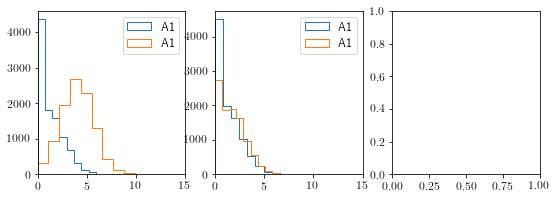

In [315]:
print(resp1.shape)
print(resp2.shape)

fig,sub = plt.subplots(1,3,figsize = (9,3))

n = 7

subf = sub[0]
subf.hist(np.reshape(resp1[0,:,0,n],[-1]),histtype="step",label = "A1")
subf.hist(np.reshape(resp1[2,:,0,n],[-1]),histtype="step",label = "A1")
subf.set_xlim([0,15])
subf.legend()

subf = sub[1]
subf.hist(np.reshape(resp1[0,:,2,n],[-1]),histtype="step",label = "A1")
subf.hist(np.reshape(resp1[2,:,2,n],[-1]),histtype="step",label = "A1")
subf.set_xlim([0,15])
subf.legend()

#subf = sub[2]
#subf.hist(np.reshape(resp1[-1,:,2,n],[-1]),histtype="step",label = "A3")
#subf.hist(np.reshape(resp2[-1,:,2,n],[-1]),histtype="step",label = "I3")
#subf.set_xlim([0,15])
#subf.legend()

plt.show()

In [316]:
print(mix_nat_resp1.shape)

MIres1 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in resp1]
MIres2 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in resp2]

def MS_MI(vec,shuff,noise = 0):
    #vec is [ntrial,nstim,nresp]
    
    out = []
    
    for k in range(shuff):
        o,t = par(len(vec))
        temp = np.array([vec[ii,:,0] for ii in o])
        nn = noise * np.random.normal(0,noise,temp.shape)
        out.append(np.mean([MI_stim(np.array([vec[ii,:,k] for ii in o]) + nn) for k in range(vec.shape[2])]))
        
    return np.mean(out),np.std(out)

MIres1 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in resp1]
MIres2 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in resp2]

MIres1BS = np.array([MS_MI(a,20) for a in resp1])
MIres2BS = np.array([MS_MI(a,20) for a in resp2])
nnMIres1BS = np.array([MS_MI(a,20,2) for a in resp1])
nnMIres2BS = np.array([MS_MI(a,20,2) for a in resp2])
print(MIres1BS.shape)

nat_MIres1 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in nat_resp1]
nat_MIres2 = [np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in nat_resp2]

nat_MIres1BS = np.array([MS_MI(a,20) for a in nat_resp1])
nat_MIres2BS = np.array([MS_MI(a,20) for a in nat_resp2])
print(MIres1BS.shape)

#mix_nat_MIres1 = [[np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in x] for x in mix_nat_resp1]
#mix_nat_MIres2 = [[np.mean([MI_stim(a[:,:,k]) for k in range(a.shape[2])]) for a in x] for x in mix_nat_resp2]

print(mix_nat_resp1.shape)
print(nat_resp1.shape)

mix_nat_MIres1BS = np.array([MS_MI(a,20) for a in mix_nat_resp1])
mix_nat_MIres2BS = np.array([MS_MI(a,20) for a in mix_nat_resp2])


(5, 1000, 3, 8)
(13, 2)
(13, 2)
(5, 1000, 3, 8)
(15, 1000, 3, 8)


In [317]:
#print(mix_nat_MIres1BS.shape)

#mix_nat_MIres1BS_sep = [np.mean(mix_nat_MIres1BS[:,:,0],axis = 0),np.sqrt(np.mean(mix_nat_MIres1BS[:,:,1]**2,axis = 0))/np.sqrt(mix_nat_MIres1BS.shape[0])]
#mix_nat_MIres2BS_sep = [np.mean(mix_nat_MIres2BS[:,:,0],axis = 0),np.sqrt(np.mean(mix_nat_MIres2BS[:,:,1]**2,axis = 0))/np.sqrt(mix_nat_MIres1BS.shape[0])]

In [318]:
dir = "./model_files/model_file_16/"

def odep_rgain_m_s(I,A,n):
        out = []
        
        for k in range(n):
            o,t = par(I.shape[0])
            
            m1 = np.mean(I[o],axis = 0)
            m2 = np.mean(A[o],axis = 0)
            out.append(m2/m1)
            
        print(np.array(out).shape)
        return np.mean(np.array(out),axis = 0),np.std(np.array(out),axis = 0)

TA_ORIrespI = np.array(utils.fetch_file(dir + "TA_responses_5_1.0_ori_tuning_0.15.pkl"))
TA_ORIrespA = np.array(utils.fetch_file(dir + "TA_responses_15_1.0_ori_tuning_0.05.pkl"))

TA_ori_recI = np.sqrt(rect(TA_ORIrespI[:,0,:,0])**2 + rect(TA_ORIrespI[:,0,:,1])**2)
TA_ori_recA = np.sqrt(rect(TA_ORIrespA[:,0,:,0])**2 + rect(TA_ORIrespA[:,0,:,1])**2)
print(TA_ori_recI.shape)

TAori_relgainm,TAori_relgains = odep_rgain_m_s(TA_ori_recI,TA_ori_recA,200)

print(TA_ORIrespI.shape)
TAoriAm = np.mean(np.sqrt(rect(TA_ORIrespA[:,0,:,0])**2 + rect(TA_ORIrespA[:,0,:,1])**2),axis = 0)
TAoriAs = np.std(np.sqrt(rect(TA_ORIrespA[:,0,:,0])**2 + rect(TA_ORIrespA[:,0,:,1])**2),axis = 0)

TAoriIm = np.mean(np.sqrt(rect(TA_ORIrespI[:,0,:,0])**2 + rect(TA_ORIrespI[:,0,:,1])**2),axis = 0)
TAoriIs = np.std(np.sqrt(rect(TA_ORIrespI[:,0,:,0])**2 + rect(TA_ORIrespI[:,0,:,1])**2),axis = 0)


(100, 20)
(200, 20)
(100, 1, 20, 2)


(3, 13, 8)
(3, 13, 8)
('CSLEN', 13)
('CSLEN', 13)


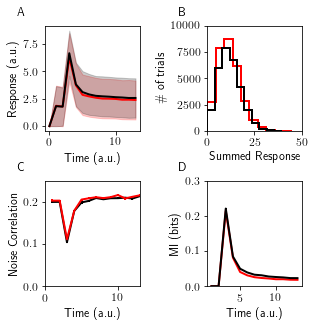

In [319]:
def odep2_rgain_m_s(A,n):
    out = []
        
    for k in range(n):
        o,t = par(A.shape[2])

        m1 = np.mean(A[:,0,o,0],axis = 1)
        m2 = np.mean(A[:,2,o,0],axis = 1)
        out.append(m2/m1)

    print(np.array(out).shape)
    return np.mean(np.array(out),axis = 0),np.std(np.array(out),axis = 0)

fig,sub=plt.subplots(2,2,figsize = (onep5,onep5))

'''
subf=sub[1,1]
subf.errorbar(np.linspace(-90,90,len(TAoriIm)),roll90(TAoriIm),yerr = roll90(TAoriIs),label = "I",color="k")
subf.errorbar(np.linspace(-90,90,len(TAoriAm)),roll90(TAoriAm),yerr = roll90(TAoriAs),label = "A",color="r")

#sub[0,0].errorbar(np.linspace(0,np.pi,8),roll90(s_mean_std[0][-1][0][::2]),roll90(s_mean_std[0][-1][1][::2]),label="A",color="r",capsize = 2)
#sub[0,0].errorbar(np.linspace(0,np.pi,8),roll90(f_mean_std[0][-1][0][::2]),roll90(f_mean_std[0][-1][1][::2]),label="I",color="k",capsize = 2)
subf.set_xticks([-90,0,90])
subf.set_xticklabels(["$-90$","$0$","$90$"])
subf.set_xlabel("Orientation")
subf.set_ylabel("Response")
subf.text(-.3,1.1,"A",transform = subf.transAxes)
'''

def stack(x):
    temp = np.append(x,x[0])
    return (temp + temp[::-1])/2
    
'''
subf=sub[0,1]
#curv= fRm[-2,3]/fRm[-2,0]
Gm,Gs = odep2_rgain_m_s(fullR,100)
#curv= fRm[-2,3]/fRm[-2,0]
#subf.errorbar(np.linspace(0,180,21),np.concatenate([TAori_relgainm,TAori_relgainm[:1]]),yerr = np.concatenate([TAori_relgains,TAori_relgains[:1]]),label="A",color = (0,0,0,1))
subf.errorbar(np.linspace(0,180,len(Gs[1])+1),stack(Gm[1]),yerr=stack(Gs[1]),color = "k")
subf.plot([0,180],[(stack(Gm[1]))[0],(stack(Gm[1]))[0]],"k--")
subf.set_xticks([0,90,180])
subf.set_xticklabels(["$0$","$90$","$180$"])
#subf.set_ylim([1.25,1.75])
subf.set_xlabel("Orientation (deg)")
subf.set_ylabel("Relative Gain")
subf.text(-.3,1.1,"B",transform = subf.transAxes)
'''
#sub[1,1].plot(np.linspace(0,np.pi,4),[(np.mean(C2[k])-np.mean(C1[k])) for k in range(len(C1))],color="k")

error = [np.abs((C2BS[k,0]-C1BS[k,0])/C1BS[k,0])*np.sqrt(((C2BS[k,1])**2 + (C1BS[k,1])**2)/(C2BS[k,0] - C1BS[k,0])**2 + (C1BS[k,1]/C1BS[k,0])**2) for k in range(len(C1BS))]



'''
subf.errorbar(np.linspace(0,180,10),stack([(C2BS[k,0]-C1BS[k,0])/C1BS[k,0] for k in range(len(C1BS))]),yerr = stack(error),color="k")
subf.plot([0,180],[0,0],"k--")
subf.set_ylabel("$(\mbox{Corr}_{I}-\mbox{Corr}_{A})/\mbox{Corr}_{A}$")
subf.set_xlabel("$\Delta$ Ori.")
subf.set_xticks([0,90,180])
#sub[1,1].set_xticklabels(["$0$","90","$360$"])
'''

dir1 = "./model_files/model_file_18/"

RR = np.array(utils.fetch_file(dir1 + "on_off_responses_1.0.pkl"))

Rresp = np.concatenate([np.sqrt(rect(RR[:,0,::2])**2 + rect(RR[:,0,1::2])**2),np.sqrt(rect(-RR[:,0,::2])**2 + rect(-RR[:,0,1::2])**2)],axis = 1)
R2resp = np.concatenate([np.sqrt(rect(RR[:,0,::2])**2),np.sqrt(rect(-RR[:,0,::2])**2)],axis = 1)

#print(Rresp.shape)fig,sub = plt.subplots(1,1,figsize = (4,2))

print(R2m.shape)
print(R1m.shape)

time1 = range(14)

subf = sub[0,0]
subf.plot(time1,np.insert(R1m[0,:,0],0,0),color="r")
subf.plot(time1,np.insert(R2m[0,:,0],0,0),color="k")
subf.fill_between(time1,np.insert(R1m[0,:,0],0,0) - np.insert(R1s[0,:,0],0,0),np.insert(R1m[0,:,0],0,0) + np.insert(R1s[0,:,0],0,0),color="r",alpha=.2)
subf.fill_between(time1,np.insert(R2m[0,:,0],0,0) - np.insert(R2s[0,:,0],0,0),np.insert(R2m[0,:,0],0,0) + np.insert(R2s[0,:,0],0,0),color="k",alpha=.2)


# subf.plot(1+np.arange(len(R2resp))-2,R2resp[:,0],"k")
# subf.plot([0,0],[0,10],"m--",label="On")
# subf.plot([10,10],[0,10],"c--",label="Off")
#sub.plot(Rresp[:,8],"r",label="Anti-Tuned")
subf.set_xlabel("Time (a.u.)")
subf.set_ylabel("Response (a.u.)")
#subf.set_ylim([0,6])
subf.text(-.3,1.1,"A",transform = subf.transAxes)

subf.legend()

subf=sub[1,0]

print("CSLEN",len(C2allBS))
print("CSLEN",len(C1allBS))
subf.errorbar(time1[1:],[x[0] for x in C2allBS],yerr=[x[1] for x in C2allBS],color="k")
subf.errorbar(time1[1:],[x[0] for x in C1allBS],yerr=[x[1] for x in C1allBS],color="r")
subf.set_ylim([0,0.25])
subf.set_xlim([0,np.max(time1)])
#sub[1,0].set_xlabel("State")
subf.set_ylabel("Noise Correlation")
subf.set_xlabel("Time (a.u.)")
subf.text(-.3,1.1,"C",transform = subf.transAxes)

subf = sub[0,1]

#subf.errorbar(np.linspace(-90,90,R1m.shape[2]),roll90(R1m[0,-1]),yerr=roll90(R1s[0,-1]))
#subf.errorbar(np.linspace(-90,90,R1m.shape[2]),roll90(R1m[1,-1]),yerr=roll90(R1s[1,-1]))
#subf.errorbar(np.linspace(-90,90,R1m.shape[2]),roll90(R1m[2,-1]),yerr=roll90(R1s[2,-1]))

subf.hist(np.reshape(np.sum(resp1[-1],axis = -1),[-1]),label="A",histtype="step",color="r",linewidth=2)
subf.hist(np.reshape(np.sum(resp2[-1],axis = -1),[-1]),label="I",histtype="step",color="k",linewidth=2)
subf.set_xlabel("Summed Response")
subf.set_ylabel("\# of trials")
subf.set_xlim([0,50])
subf.set_ylim([0,10000])

subf.text(-.3,1.1,"B",transform = subf.transAxes)

subf = sub[1,1]
subf.errorbar(time1[1:],MIres1BS[:,0],yerr=MIres1BS[:,1],label = "A",color="r")
subf.errorbar(time1[1:],MIres2BS[:,0],yerr=MIres2BS[:,1],label = "I",color="k")
subf.set_ylim([0,.3])
subf.set_xlabel("Time (a.u.)")
subf.set_ylabel("MI (bits)")

subf.text(-.3,1.1,"D",transform = subf.transAxes)
#subf.text(.1,.8,"Grating Stimuli",transform = subf.transAxes)

plt.tight_layout()

plt.savefig("./att_MGSM_Figures/MI_CORR_results.png",bbox_inches="tight")
plt.savefig("./att_MGSM_Figures/MI_CORR_results.pdf",bbox_inches="tight")

plt.show()

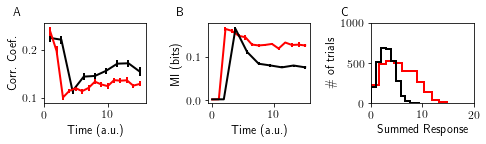

In [320]:
fig,sub = plt.subplots(1,3,figsize=(twocol,twocol/3))

subf = sub[1]

#subf.errorbar(np.linspace(0,15,len(MIres1)),nnMIres1BS[:,0],yerr=nnMIres1BS[:,1],label = "A",color="r",capsize = 2)
#subf.errorbar(np.linspace(0,15,len(MIres2)),nnMIres2BS[:,0],yerr=nnMIres2BS[:,1],label = "I",color="k",capsize = 2)
#subf.errorbar(np.linspace(0,15,len(mix_nat_MIres1BS)),mix_nat_MIres1BS[:,0],yerr=mix_nat_MIres1BS[:,1],fmt="--",label = "A",color="r")
#subf.errorbar(np.linspace(0,15,len(mix_nat_MIres2BS)),mix_nat_MIres2BS[:,0],yerr=mix_nat_MIres2BS[:,1],fmt="--",label = "I",color="k")
subf.errorbar(np.linspace(0,15,len(nat_MIres1BS)),nat_MIres1BS[:,0],yerr=nat_MIres1BS[:,1],label = "A",color="r")
subf.errorbar(np.linspace(0,15,len(nat_MIres2BS)),nat_MIres2BS[:,0],yerr=nat_MIres2BS[:,1],label = "I",color="k")
subf.set_xlabel("Time (a.u.)")
subf.set_ylabel("MI (bits)")
#subf.set_ylim([.05,.3])
#subf.text(.1,.8,"Natural Images",transform = subf.transAxes)
subf.text(-.3,1.1,"B",transform = subf.transAxes)

subf=sub[0]
subf.errorbar(np.linspace(1,15,len(nat_C2allBS)),[x[0] for x in nat_C2allBS],yerr=[x[1] for x in nat_C2allBS],color="k")
subf.errorbar(np.linspace(1,15,len(nat_C1allBS)),[x[0] for x in nat_C1allBS],yerr=[x[1] for x in nat_C1allBS],color="r")
#subf.errorbar(np.linspace(1,15,len(mix_nat_C2allBS)),[x[0] for x in mix_nat_C2allBS],yerr=[x[1] for x in mix_nat_C2allBS],fmt = "--",color="k")
#subf.errorbar(np.linspace(1,15,len(mix_nat_C1allBS)),[x[0] for x in mix_nat_C1allBS],yerr=[x[1] for x in mix_nat_C1allBS],fmt = "--",color="r")
#subf.set_ylim([0,.005])
subf.set_xlim([0,16])
subf.set_xticks([0,10])
#sub[1,0].set_xlabel("State")
subf.set_ylabel("Corr. Coef.")
subf.set_xlabel("Time (a.u.)")
subf.text(-.3,1.1,"A",transform = subf.transAxes)

subf = sub[2]
subf.hist(np.reshape(np.sum(nat_resp1[-1],axis = -1),[-1]),label="A",histtype="step",color="r",linewidth=2)
subf.hist(np.reshape(np.sum(nat_resp2[-1],axis = -1),[-1]),label="I",histtype="step",color="k",linewidth=2)
subf.set_xlabel("Summed Response")
subf.set_ylabel("\# of trials")
subf.set_xlim([0,20])
subf.set_ylim([0,1000])
subf.text(-.3,1.1,"C",transform = subf.transAxes)
plt.tight_layout()


plt.savefig("./att_MGSM_Figures/nat_MI_CORR_results.png",bbox_inches="tight")
plt.savefig("./att_MGSM_Figures/nat_MI_CORR_results.pdf",bbox_inches="tight")

plt.show()

In [321]:
import PIL.Image as image

In [322]:
d1=np.array(image.open("./att_MGSM_Figures/DADARLAT.jpg"))
d2=np.array(image.open("./att_MGSM_Figures/DADARLAT_CURVES.jpg"))
m1=np.array(image.open("./att_MGSM_Figures/mineqault.jpeg"))
d1[:40,:30] = (255,255,255)
m1[:40,:40] = (255,255,255)
MIdar = d1[:,:450]
OTdar = d2[350:690,730:]
SFMIN = m1[:290,:325]

(604, 682, 3)


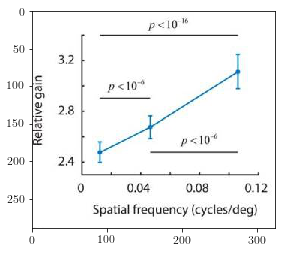

In [323]:
print(m1.shape)

plt.imshow(m1[:290,:325])
plt.show()

In [1090]:
plt.clf()
fig,sub=plt.subplots(2,3,figsize=(twocol,twocol*2/3))

subf = sub[1,0]
subf.errorbar(time1,MIres1BS[:,0],yerr=MIres1BS[:,1],label = "A",color="r")
subf.errorbar(time2,MIres2BS[:,0],yerr=MIres2BS[:,1],label = "I",color="k")
subf.set_ylim([.3,.45])
subf.set_xlabel("Time Post-Stim. Onset (a.u.)")
subf.set_ylabel("MI (bits)")

subf.text(-.35,1.1,"D",transform = subf.transAxes)
#subf.text(.1,.8,"Grating Stimuli",transform = subf.transAxes)

subf = sub[0,0]
subf.errorbar(np.linspace(0,2*np.pi,len(fRm[0,0])),roll90(fRm[3,-3,:]),yerr= fRs[3,-3,:],label="I",color="k")
subf.errorbar(np.linspace(0,2*np.pi,len(fRm[0,0])),roll90(fRm[3,-1,:]),yerr = fRs[3,-1,:],label="A",color="r")
subf.set_xlim([0,2*np.pi])
subf.set_ylim([0,10])
subf.legend(loc = (.65,.7))
subf.set_xticks([0,np.pi,2*np.pi])
subf.set_xticklabels(["$-90$","$0$","$90$"])
subf.set_yticks([0,5,10])
subf.text(-.35,1.1,"A",transform = subf.transAxes)
subf.set_xlabel("Orientation (deg.)")
subf.set_ylabel("Response")

subf = sub[0,2]
subf.errorbar(W,fGm,yerr=fGs,color='k')
subf.legend()
subf.set_xlabel("Spatial Frequency (1/px.)")
subf.set_ylabel("Relative Gain")
subf.set_xticks([0,.1,.2])
subf.set_yticks([0,2,4])
subf.text(-.35,1.1,"C",transform = subf.transAxes)

subf = sub[0,1]
subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-2],SSs[-2],label="I",color=(0,0,0))
subf.errorbar(np.linspace(0,1,len(SSm[0])),SSm[-1],SSs[-1],label="A",color=(1,0,0))
subf.set_xlim([0,1])
subf.set_ylim([0,10])
subf.set_xticks([0,.5,1])
subf.set_yticks([0,5,10])
subf.set_xlabel("Stimulus Size")
subf.set_ylabel("Response")
subf.text(-.35,1.1,"B",transform = subf.transAxes)

MId = utils.fetch_file("./MI_data")
NCd = utils.fetch_file("./noise_cor_data")
REd = utils.fetch_file("./responses_run.pkl")
runTR,stiTR = REd

subf = sub[1,1]
subf.errorbar(np.arange(-5,10,1,np.float32)/10,np.mean(runTR,axis = (0)),yerr=np.std(runTR,axis = (0))/np.sqrt(np.prod(runTR.shape)),label = "running",color = "r")
subf.errorbar(np.arange(-5,10,1,np.float32)/10,np.mean(stiTR,axis = (0)),yerr=np.std(stiTR,axis = (0))/np.sqrt(np.prod(stiTR.shape)),label = "still",color = "k")

subf.plot([-.5,1],[0,0],"k--")
subf.set_ylim([-.005,.025])
subf.plot([0,0],[0,10],"k--")
subf.plot([.5,.5],[0,10],"k--")
subf.set_xticks([-.5,0,.5])
subf.set_ylabel("Firing Rate (hz.)")
subf.set_xlabel("Time (sec.)")
subf.text(-.35,1.1,"E",transform = subf.transAxes)
subf.text(.05,.8,"Data",transform = subf.transAxes)

subf = sub[1,2]
subf.errorbar(np.arange(-5,10,1,np.float32)/10,NCd[0],yerr =  NCd[1],color = "r")
subf.plot([0,0],[0,.2],"k--")
subf.plot([.6,.6],[0,.2],"k--")
subf.set_xlabel("Time (sec.)")
subf.set_ylabel("Noise Correlation")
subf.set_ylim([0,.15])
subf.text(-.35,1.1,"F",transform = subf.transAxes)
subf.text(.05,.8,"Data",transform = subf.transAxes)

plt.tight_layout()
plt.savefig("./att_MGSM_Figures/prelim_result_compare.pdf",dpi = 72,bbox_inches = "tight")
plt.show()

RuntimeError: xdata and ydata must be the same length

In [410]:

DD = "./model_files/model_file_18"

nf = ["5","11","21","41"]
dt = ["0.5","0.2","0.1","0.05"]
snr = ["0.5","0.75","1.0","2.0"]

ORI = [np.array([[np.array(utils.fetch_file(DD + "/TA_responses_1.0_{}_{}_MI_grat_{}.pkl".format(i,ii,dt[k]))) for ii in snr] for i in range(1,int(nf[k]))]) for k in range(len(dt))]
ORIv = [np.array([[np.array(utils.fetch_file(DD + "/variance_TA_responses_1.0_{}_{}_MI_grat_{}.pkl".format(i,ii,dt[k]))) for ii in snr] for i in range(1,int(nf[k]))]) for k in range(len(dt))]
for o in ORI:
    print(o.shape)
    
rr = [np.sqrt(rect(r[:,:,:,:,:,::2])**2 + rect(r[:,:,:,:,:,1::2])**2) for r in ORI]
rrv = [np.sqrt(r[:,:,:,:,:,::2,::2] + r[:,:,:,:,:,1::2,1::2]) for r in ORIv]

rr = [np.mean(r,axis = (2,3)) for r in rr]
rrv = [np.mean(r,axis = (2,3)) for r in rrv]
for r in rr:
    print(r.shape)

(4, 4, 100, 1, 3, 16)
(10, 4, 100, 1, 3, 16)
(20, 4, 100, 1, 3, 16)
(40, 4, 100, 1, 3, 16)
(4, 4, 3, 8)
(10, 4, 3, 8)
(20, 4, 3, 8)
(40, 4, 3, 8)


/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


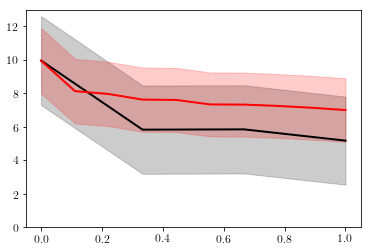

In [402]:
col = ["k","r","g","m"]

s = 0
c = 0

for r in range(2):
    plt.plot(np.linspace(0,1,len(rr[r])),rr[r][:,s,c,0],color = col[r])
#    plt.errorbar(np.linspace(0,1,len(rr[r])),rr[r][:,s,c,0],yerr = rrv[r][:,s,c,0,0],color = col[r])
    plt.fill_between(np.linspace(0,1,len(rr[r])),rr[r][:,s,c,0] - rrv[r][:,s,c,0,0],rr[r][:,s,c,0] + rrv[r][:,s,c,0,0],alpha = .2,color = col[r])
    
plt.ylim([0,13])
plt.show()

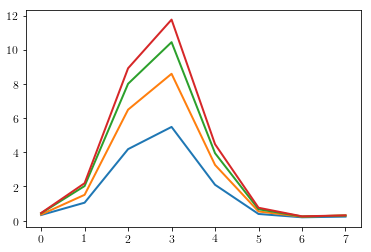

In [388]:
c = 1
for r in rr:
    plt.plot(r[-1,s,c,:])
plt.show()

In [418]:
def generate_samples(mdat,vdat):    
    #(4, 4, 100, 1, 3, 16)
    #[t,snr,nsam,1,ncon,nneur]
    mrs = np.reshape(mdat,[-1,mdat.shape[-1]])
    vrs = np.reshape(vdat,[-1,mdat.shape[-1],mdat.shape[-1]])
    
    print(np.mean(mdat))
    for v in vrs:
        if np.isnan(np.mean(np.diag(v))):
            print(v)
    
    samples = np.array([np.random.multivariate_normal(mrs[k],vrs[k],10) for k in range(len(mrs))])
    
    samples = np.sqrt(rect(samples[:,:,::2])**2 + rect(samples[:,:,1::2])**2)
    
    return samples

In [419]:
sam = [generate_samples(rr[k],rrv[k]) for k in range(len(rr))]

2.18618482464


ValueError: array must not contain infs or NaNs

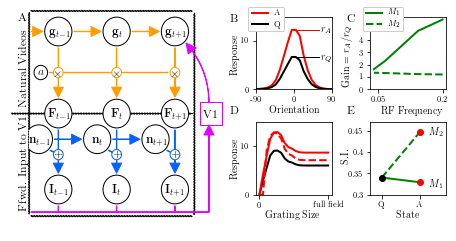

In [893]:
from matplotlib import pyplot as plt
from matplotlib import patches as patch
import matplotlib.path as path
from matplotlib import rc
font = {'family' : 'arial',
        'size'   : 12}

rc('font', **font)
rc('text', usetex=True)

fig = plt.figure(figsize = (6,3))

onetwo = True

ax = fig.add_axes([.025,.025,.45,.95])

ax11 = fig.add_axes([.55,.613,.175,.335])
ax12 = fig.add_axes([.815,.613,.175,.335])
ax21 = fig.add_axes([.55,.125,.175,.335])
ax22 = fig.add_axes([.815,.125,.175,.335])

axis_fontsize = 8

x1 = .15
x2 = .45
x3 = .75

#x1 = .25
#x2 = .55
#x3 = .85


rr = .07
r2 = .025

gy = .9

Iy = .5

ny = .375
dxn = -.1

Wy = .13
drw = 0


tcol = "#FF9C00"#'#F0810F'#(6./255,6./255,249./255)
ocol = "#0461FF"#'#063852'#"k"
v1col = "#E001FF"#'#E6df44'#"c"#(.5,.5,.5,1)

ccol = "k"#'#063852'#"k"
bcol = "k"#'#011A27'#"m"


arsty = patch.ArrowStyle.Simple(head_length=10, head_width=10, tail_width=.4)
ar0sty = patch.ArrowStyle.Simple(head_length=1, head_width=1, tail_width=.4)
ar1sty = patch.ArrowStyle.Simple(head_length=1, head_width=1, tail_width=1)

#a variable
ay = .7
aX = .06
ax.add_patch(patch.Circle((aX,ay),.07/2,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(aX-.015,.69,"$a$")

ax.add_patch(patch.FancyArrowPatch((aX+.07/2,ay),(x3-r2,ay),arrowstyle=ar0sty,color = tcol))

for x in [x1,x2,x3]:
    ax.add_patch(patch.Circle((x,ay),r2,edgecolor = tcol,facecolor = (1,1,1,1),zorder = 100))
    ax.text(x-.02,ay-.015,"$\\times$",zorder = 100)



#g variables
ax.add_patch(patch.FancyArrowPatch((0,gy),(x1-rr,gy),arrowstyle=arsty,color = tcol))
ax.add_patch(patch.Circle((x1,gy),rr,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x1 - .05,gy - .025,"$\mathbf{g}_{t-1}$")

ax.add_patch(patch.FancyArrowPatch((x1,gy - rr),(x1,Iy+rr),arrowstyle=arsty,color = tcol))

ax.add_patch(patch.FancyArrowPatch((x1+rr,gy),(x2-rr,gy),arrowstyle=arsty,color = tcol))
ax.add_patch(patch.Circle((x2,gy),rr,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x2 - .025,gy - .025,"$\mathbf{g}_{t}$")

ax.add_patch(patch.FancyArrowPatch((x2,gy - rr),(x2,Iy+rr),arrowstyle=arsty,color = tcol))

ax.add_patch(patch.FancyArrowPatch((x2+rr,gy),(x3-rr,gy),arrowstyle=arsty,color = tcol))
ax.add_patch(patch.Circle((x3,gy),rr,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x3 - .05,gy - .025,"$\mathbf{g}_{t+1}$")

ax.add_patch(patch.FancyArrowPatch((x3,gy - rr),(x3,Iy+rr),arrowstyle=arsty,color = tcol))

#ax.add_patch(patch.FancyArrowPatch((x3+rr,gy),(1,gy),arrowstyle=arsty,color = tcol))

#I variables
ax.add_patch(patch.Circle((x1,Iy),rr,edgecolor = ccol,facecolor = (1,1,1,1)))
ax.text(x1 - .055,Iy - .025,"$\mathbf{F}_{t-1}$")

ax.add_patch(patch.FancyArrowPatch((x1,Iy - rr),(x1,Wy+rr),arrowstyle=arsty,color = ocol))

ax.add_patch(patch.Circle((x2,Iy),rr,edgecolor = ccol,facecolor = (1,1,1,1)))
ax.text(x2 - .03,Iy - .025,"$\mathbf{F}_{t}$")

ax.add_patch(patch.FancyArrowPatch((x2,Iy - rr),(x2,Wy+rr),arrowstyle=arsty,color = ocol))

ax.add_patch(patch.Circle((x3,Iy),rr,edgecolor = ccol,facecolor = (1,1,1,1)))
ax.text(x3-.055,Iy - .025,"$\mathbf{F}_{t+1}$")

ax.add_patch(patch.FancyArrowPatch((x3,Iy - rr),(x3,Wy+rr),arrowstyle=arsty,color = ocol))

#noise variables
ax.add_patch(patch.FancyArrowPatch((0,ny),(x1+dxn-rr,ny),arrowstyle=arsty,color = ocol))
ax.add_patch(patch.Circle((x1 + dxn,ny),rr,edgecolor = ccol,facecolor = (1,1,1,1),zorder = 100))
ax.text(x1 + dxn - .05,ny - .025,"$\mathbf{n}_{t-1}$",zorder = 101)

ax.add_patch(patch.FancyArrowPatch((x1+dxn+rr,ny),(x2+dxn-rr,ny),arrowstyle=arsty,color = ocol))
ax.add_patch(patch.Circle((x2 + dxn,ny),rr,edgecolor = ccol,facecolor = (1,1,1,1),zorder = 100))
ax.text(x2 + dxn - .025,ny - .025,"$\mathbf{n}_{t}$",zorder = 101)

ax.add_patch(patch.FancyArrowPatch((x2+dxn+rr,ny),(x3+dxn-rr,ny),arrowstyle=arsty,color = ocol))
ax.add_patch(patch.Circle((x3 + dxn,ny),rr,edgecolor = ccol,facecolor = (1,1,1,1),zorder = 100))
ax.text(x3 + dxn - .05,ny - .025,"$\mathbf{n}_{t+1}$",zorder = 101)

#ax.add_patch(patch.FancyArrowPatch((x3+dxn+rr,ny),(1,ny),arrowstyle=arsty,color = tcol))


#observations
ax.add_patch(patch.Circle((x1,Wy),rr + drw,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x1 - .05,Wy - .025,"$\mathbf{I}_{t-1}$")

ax.add_patch(patch.Circle((x2,Wy),rr + drw,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x2 - .025,Wy - .025,"$\mathbf{I}_{t}$")

ax.add_patch(patch.Circle((x3,Wy),rr + drw,edgecolor = ccol,facecolor = (0,0,0,0)))
ax.text(x3 - .05,Wy - .025,"$\mathbf{I}_{t+1}$")

import numpy as np
ang = np.pi/4

for x in [x1,x2,x3]:
    ax.add_patch(patch.FancyArrowPatch((x + dxn + rr*np.sin(ang),ny - rr*np.cos(ang)),(x,Wy + rr + .1),arrowstyle=ar0sty,color = ocol))
    ax.add_patch(patch.Circle((x,Wy + rr + .1),r2,edgecolor = ocol,facecolor = (1,1,1,1),zorder = 100))
    ax.text(x-.02,Wy + rr + .1-.015,"$+$",zorder = 100)

ax.axis('off')

Wrf = np.array(Wrf)

if onetwo:
    ax12.plot(Wrf,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 1),color="g",label = r"$M_{1}$")
    ax12.plot(Wrf,np.mean(MAX[:,-1]/MAX[:,0],axis = 1),"--",color="g",label = r"$M_{2}$")
else:
    ax12.plot(Wrf,np.mean(MAX[:,:,-1]/MAX[:,:,0],axis = 1),color="g",label = r"$M_{2}$")
    ax12.plot(Wrf,np.mean(MAX[:,-1]/MAX[:,0],axis = 1),"--",color="g",label = r"$M_{1}$")
    
#ax12.legend()
ax12.set_xticks([.05,.2])
ax12.set_xticklabels(["0.05","0.2"],fontsize = axis_fontsize)
ax12.set_yticks([0,1,2,3,4])
ax12.set_yticklabels(["0","1","2","3","4"],fontsize = axis_fontsize)
#ax12.set_xlabel("RF freq. (1/px.)")
#ax12.set_ylabel("Relative Gain")

#ax22.plot(np.linspace(0,1,SIs.shape[1]),np.mean(SIs,axis = 0),label = r"$\alpha$",color = "r")
#ax22.plot(np.linspace(0,1,SIs.shape[0]),np.mean(SIs,axis = 1),"--",label = r"$\beta$",color = "r")

#ax22.plot([.25,.75],SIs[-2,[0,-1]],label = r"$\alpha$",color = "g")
#ax22.plot([.25,.75],SIs[[-2,-1],0],"--",label = r"$\alpha$",color = "g")
#ax22.plot([.25],[SIs[-2,0]],".",label = r"$\alpha$",color = "k",markersize = 10)
#ax22.plot([.75,.75],[SIs[-1,0],SIs[-2,-1]],".",label = r"$\alpha$",color = "r",markersize = 10)

#aind = [[-2,-1]]
#bind = [[0,-1]]

aind = [[1,3]]
bind = [[1,2]]

for i in aind:
    for j in bind:
                ax22.plot([.25,.75],SIs[i[0],j],label = r"$\alpha$",color = "g")
                ax22.plot([.25,.75],SIs[i,j[0]],"--",label = r"$\alpha$",color = "g")
                ax22.plot([.25],[SIs[i[0],j[0]]],"o",label = r"$\alpha$",color = "k")
                ax22.plot([.75,.75],[SIs[i[1],j[0]],SIs[i[0],j[1]]],"o",label = r"$\alpha$",color = "r")

                
#ax22.plot([0,1],[SIs[i[0],j[0]],SIs[i[0],j[0]]],"k--")

#ax22.plot([0,1],np.mean(SIs,axis = 1),"--",label = r"$\beta$",color = "r")
ax22.set_xticks([.25,.75])
ax22.set_xticklabels(["Q","A"],fontsize = axis_fontsize)

ax22.set_yticks([.3,.35,.4,.45])
ax22.set_yticklabels(["0.3","0.35","0.4","0.45"],fontsize = axis_fontsize)

ax22.set_xlim([.1,1.1])
ax22.set_ylim([.3,.47])

ax11.plot(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,-1]),color = "r",label = "A")

ax11.plot([0,60],[atar[2,0,-1,0],atar[2,0,-1,0]],color = "r",linewidth = 1)
ax11.plot([0,60],[atar[2,0,0,0],atar[2,0,0,0]],color = "k",linewidth = 1)


#ax21.fill_between(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,-1] - astar[2,0,-1]),roll90(atar[2,0,-1] + astar[2,0,-1]),alpha = .2,color = "r")
ax11.plot(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,0]),color = "k",label = "Q")
#ax21.fill_between(np.linspace(-90,90,atar.shape[3]),roll90(atar[2,0,0] - astar[2,0,0]),roll90(atar[2,0,0] + astar[2,0,0]),alpha = .2,color = "k")
ax11.set_ylim([0,15])
ax11.set_xlim([-90,90])
ax11.set_xticks([-90,0,90])
ax11.set_xticklabels(["-90","0","90"],fontsize = axis_fontsize)

ax11.set_yticks([0,10])
ax11.set_yticklabels(["0","10"],fontsize = axis_fontsize)

ax21.plot(np.linspace(0,1,len(tar[1][0])),tar[1][1],"k")
ax21.plot(np.linspace(0,1,len(tar[1][0])),tar[1][2],"r")
ax21.plot(np.linspace(0,1,len(tar[1][0])),tar[3][1],"r--")

#ax21.fill_between(np.linspace(0,1,len(tar[1][1])),tar[1][2] - star[1][2],tar[1][2] + star[1][2],color = "r",alpha = .2)
ax21.set_ylim([0,15])
ax21.set_xticks([0,1])
ax21.set_xticklabels(["0","full field"],fontsize = axis_fontsize)

ax21.set_yticks([0,10])
ax21.set_yticklabels(["0","10"],fontsize = axis_fontsize)


ax11.legend(loc = (-.1,.8),fontsize = 8,framealpha = 1)
ax12.legend(loc = (-.1,.8),fontsize = 8,framealpha = 1)

fig.text(0,.925,"A",fontsize = 12)

fig.text(.49,.925,"B",fontsize = 12)
fig.text(.76,.925,"C",fontsize = 12)
fig.text(.49,.5,"D",fontsize = 12)
fig.text(.76,.5,"E",fontsize = 12)


dxx3 = .03
ax.add_patch(patch.FancyArrowPatch((0,1),(0,0),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))
ax.add_patch(patch.FancyArrowPatch((-.1,Iy),(x3 + rr + dxx3,Iy),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))

ax.add_patch(patch.FancyArrowPatch((0,1),(x3 + rr + dxx3,1),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))
ax.add_patch(patch.FancyArrowPatch((0,0),(x3 + rr + dxx3,0),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))
#ax.add_patch(patch.FancyArrowPatch((1,0),(1,1),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))

ax.add_patch(patch.FancyArrowPatch((x3 + rr + dxx3,0),(x3 + rr + dxx3,1),arrowstyle=ar1sty,color = bcol,zorder = 0,clip_on=False,linestyle=":"))


fig.text(0,.85,"Natural Videos",rotation = 90,color = bcol)

axeslabel_size = 10

fig.text(.57,0.02,"Grating Size",fontsize = axeslabel_size)
fig.text(.49,.35,"Response",rotation = 90,fontsize = axeslabel_size)

fig.text(.58,.5,"Orientation",fontsize = axeslabel_size)
fig.text(.49,.83,"Response",rotation = 90,fontsize = axeslabel_size)

fig.text(.875,0.02,"State",fontsize = axeslabel_size)
fig.text(.75,.3,"S.I.",rotation = 90,fontsize = axeslabel_size)

fig.text(.84,.5,"RF Frequency",fontsize = axeslabel_size)
fig.text(.75,.87,"Gain = $r_{A}/r_{Q}$",rotation = 90,fontsize = axeslabel_size)

#fig.text(.82,.135,"Consistent",fontsize = axeslabel_size)
#fig.text(.82,.41,"Inconsistent",fontsize = axeslabel_size)

fig.text(.7,.875,"$r_{A}$",fontsize = axeslabel_size)
fig.text(.7,.75,"$r_{Q}$",fontsize = axeslabel_size)

if onetwo:
    fig.text(.95,.4,"$M_{2}$",fontsize = axeslabel_size)
    fig.text(.95,.16,"$M_{1}$",fontsize = axeslabel_size)
else:
    fig.text(.95,.4,"$M_{1}$",fontsize = axeslabel_size)
    fig.text(.95,.16,"$M_{2}$",fontsize = axeslabel_size)

# ax.add_patch(patch.FancyArrowPatch((x1 - rr*np.cos(np.pi/4),Wy + rr*np.cos(np.pi/4)),(x1 - rr*np.cos(np.pi/4),gy - rr*np.cos(np.pi/4)),arrowstyle=arsty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = -.15)))
# ax.add_patch(patch.FancyArrowPatch((x2 - rr*np.cos(np.pi/4),Wy + rr*np.cos(np.pi/4)),(x2 - rr*np.cos(np.pi/4),gy - rr*np.cos(np.pi/4)),arrowstyle=arsty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = -.15)))
# ax.add_patch(patch.FancyArrowPatch((x3 - rr*np.cos(np.pi/4),Wy + rr*np.cos(np.pi/4)),(x3 - rr*np.cos(np.pi/4),gy - rr*np.cos(np.pi/4)),arrowstyle=arsty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = -.15)))

# dv1 = .02

# ax.add_patch(patch.Circle((x1 - .1 - dv1,Wy+.18 - dv1),rr*.8,edgecolor = v1col,facecolor = (1,1,1,1)))
# ax.text(x1 - .1 - .035 - dv1,Wy+.18 - .026 - dv1,"V1",clip_on=True)

# ax.add_patch(patch.Circle((x2 - .1 - dv1,Wy+.18 - dv1),rr*.8,edgecolor = v1col,facecolor = (1,1,1,1)))
# ax.text(x2 - .1 - .035 - dv1,Wy+.18 - .026 - dv1,"V1")

# ax.add_patch(patch.Circle((x3 - .1 - dv1,Wy+.18 - dv1),rr*.8,edgecolor = v1col,facecolor = (1,1,1,1)))
# ax.text(x3 - .1 - .035 - dv1,Wy+.18 - .026 - dv1,"V1")

Vx = (x3 + rr + dxx3 + 1)/2

ax.add_patch(patch.FancyArrowPatch((x1,Wy - rr),(x1,.01),arrowstyle=ar0sty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = 0)))
ax.add_patch(patch.FancyArrowPatch((x2,Wy - rr),(x2,.01),arrowstyle=ar0sty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = 0)))
ax.add_patch(patch.FancyArrowPatch((x3,Wy - rr),(x3,.01),arrowstyle=ar0sty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = 0)))

ax.add_patch(patch.FancyArrowPatch((0,.02),(Vx+.01,.02),arrowstyle=ar0sty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = 0)))
ax.add_patch(patch.FancyArrowPatch((Vx,.01),(Vx,Iy - rr * .8 + .01),arrowstyle=arsty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = 0)))

ax.add_patch(patch.FancyArrowPatch((Vx,Iy + rr*.8 - .01),(x3 + rr*np.cos(np.pi/4),gy - rr*np.cos(np.pi/4)),arrowstyle=arsty,color = v1col,zorder = 0,connectionstyle=patch.ConnectionStyle("Arc3", rad = .2)))

#ax.add_patch(patch.Circle((Vx,Iy),rr*.8,edgecolor = v1col,facecolor = (1,1,1,1)))
left = x3 + rr + dxx3 + .03
ax.add_patch(patch.Rectangle((left,Iy-rr*.8),1 - left - .01,2*rr*.8,edgecolor = v1col,facecolor = (1,1,1,0)))

ax.text(Vx- .03,Iy - .025,"V1",clip_on=True)

fig.text(0,.45,"Ffwd. Input to V1",rotation = 90,color = bcol)

if onetwo:
    plt.savefig("att_MGSM_Figures/AbstractFigure_12.pdf")
else:
    plt.savefig("att_MGSM_Figures/AbstractFigure_21.pdf")
plt.show()



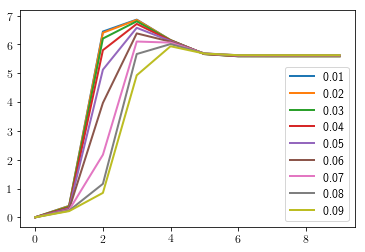

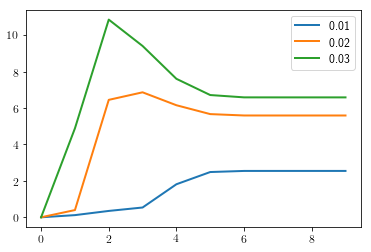

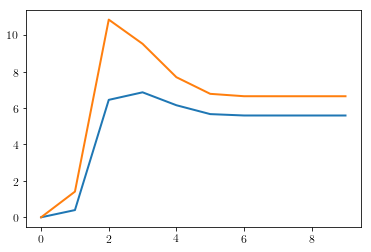

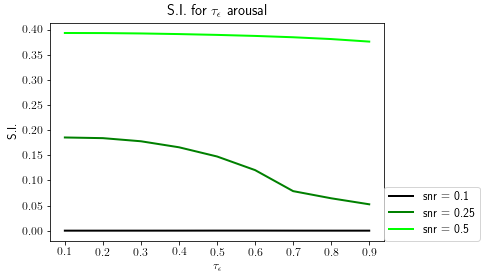

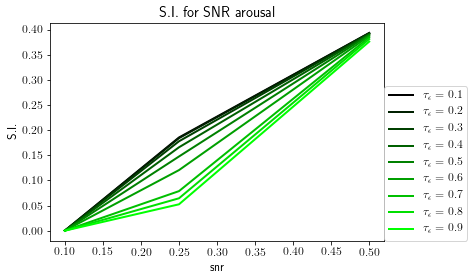

In [605]:
def SI(x):
    a = x/np.max(x)
    return 1 - a[-1]

snr = ["0.1","0.25","0.5"]
ndt = ["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09"]
ts = .1

A=[[rect(np.array(utils.fetch_file("./model_files/model_file_26/tcornoise_{}_signal_tau_0.1responses_1.0_20_{}_size_tuning_0.1.pkl".format(n,k)))[0,:,0]) for n in ndt] for k in snr]

for a in range(len(A[0])):
    plt.plot(A[1][a],label = str(ndt[a]))
    plt.legend()
plt.show()

for a in range(len(A)):
    plt.plot(A[a][0],label = str(ndt[a]))
    plt.legend()
plt.show()

plt.plot(A[1][0])
plt.plot(A[2][5])
plt.show()

sis = np.array([[SI(x) for x in a] for a in A])
mis = np.array([[np.max(x) for x in a] for a in A])


snrcol = np.linspace(0,1,sis.shape[0])
for k in range(sis.shape[0]):
    plt.plot([float(x)/ts for x in ndt],sis[k],label = "snr = {}".format(snr[k]),color = (0,snrcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for $\\tau_{\epsilon}$ arousal")
plt.xlabel("\\tau_{\epsilon}")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/GSM_SI_ndt.pdf")
plt.show()

ndtcol = np.linspace(0,1,sis.shape[1])
for k in range(sis.shape[1]):
    plt.plot([float(x) for x in snr],sis[:,k],label = "$\\tau_\epsilon = {}$".format(float(ndt[k])/ts),color = (0,ndtcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for SNR arousal")
plt.xlabel("snr")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/GSM_SI_snr.pdf")
plt.show()


In [310]:
A[0][-1][:3]

array([ 0.00043372,  0.07827935,  0.19991567])

In [311]:
AM=np.array(utils.fetch_file("./model_files/model_file_26/tcornoise_0.01_amax_responses_1.0_10_1.0_size_tuning_0.1.pkl"))

(1, 1, 1, 20)


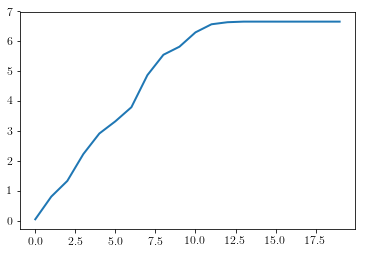

In [312]:

print(AM.shape)
plt.plot(AM[0,0,0])
plt.show()

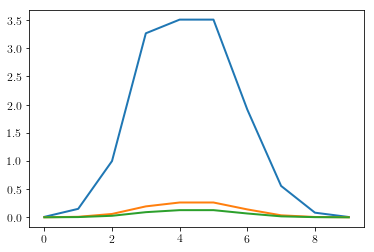

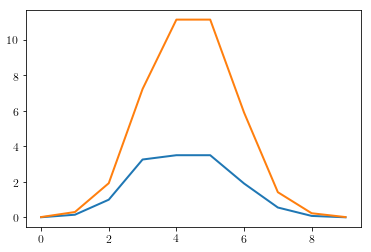

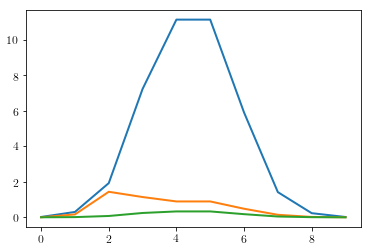

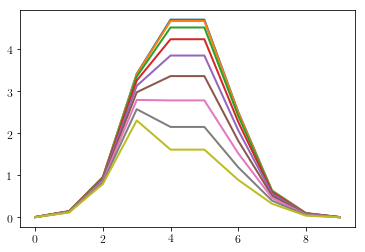

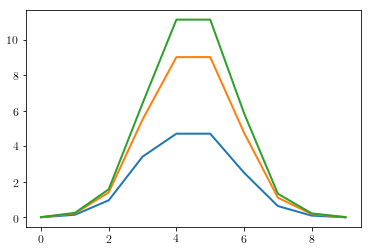

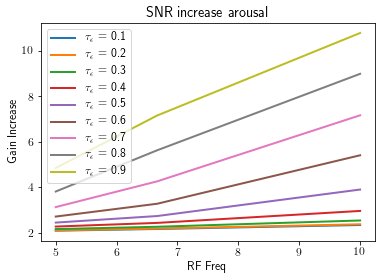

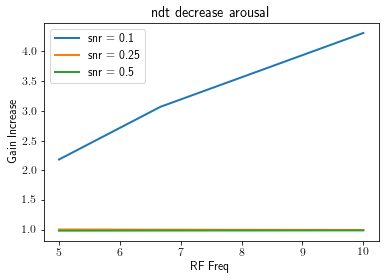

In [624]:
snr = ["0.1","0.25","0.5"]
ndt = ["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09"]
ST = ["0.1","0.15","0.2"]
ts = .1
R=np.array([[[utils.fetch_file("./model_files/model_file_16/tcornoise_{}_signal_tau_{}responses_1.0_20_{}_ori_tuning_0.1.pkl".format(j,i,k))[0] for k in snr] for j in ndt] for i in ST])
R = rect(R[:,:,:,:,0])

Rspecial=np.array([[utils.fetch_file("./model_files/model_file_16/tcornoise_{}_signal_tau_0.1responses_1.0_100_{}_ori_tuning_0.01.pkl".format(ND,sn))[0] for sn in ["0.1","0.25"]] for ND in ["0.025","0.09","0.2"]])
Rspecial = rect(Rspecial[:,:,:,0])

plt.plot(np.roll(Rspecial[0,0],5))
plt.plot(np.roll(Rspecial[1,0],5))
plt.plot(np.roll(Rspecial[2,0],5))
plt.show()

plt.plot(np.roll(Rspecial[0,0],5))
plt.plot(np.roll(Rspecial[0,1],5))
plt.show()

plt.plot(np.roll(Rspecial[0,1],5))
plt.plot(np.roll(Rspecial[1,1],5))
plt.plot(np.roll(Rspecial[2,1],5))
plt.show()
#[f,ndt,snr]

for k in range(len(ndt)):
    plt.plot(np.roll(R[-1,k,0],5))
plt.show()


for k in range(len(snr)):
    plt.plot(np.roll(R[-1,0,k],5))
plt.show()

snrA = np.mean(R[:,:,-1]/R[:,:,0],-1)
ndtA = np.mean(R[:,0]/R[:,-1],-1)

for k in range(snrA.shape[1]):
    plt.plot([1./float(x) for x in ST],snrA[:,k],label = "$\\tau_\epsilon$ = {}".format(float(ndt[k])/ts))
plt.title("SNR increase arousal")
plt.xlabel("RF Freq")
plt.ylabel("Gain Increase")
plt.legend()
plt.savefig("ATT_full_model_test_figures/GSM_GI_snr.pdf")
plt.show()

for k in range(ndtA.shape[1]):
    plt.plot([1./float(x) for x in ST],ndtA[:,k],label = "snr = {}".format(snr[k]))
plt.title("ndt decrease arousal")
plt.xlabel("RF Freq")
plt.ylabel("Gain Increase")
plt.legend()
plt.savefig("ATT_full_model_test_figures/GSM_GI_ndt.pdf")
plt.show()


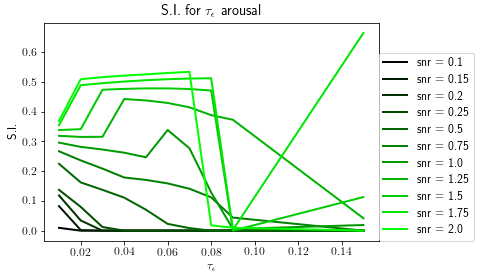

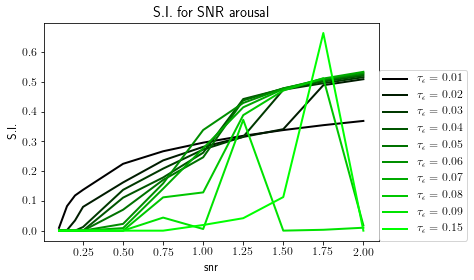

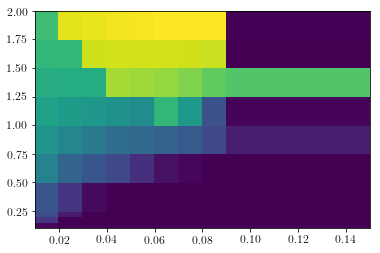

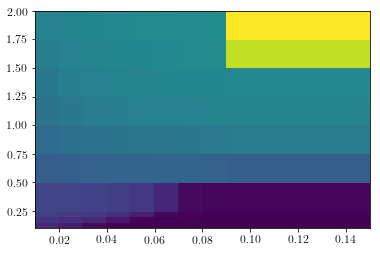

In [758]:
snr = ["0.1","0.15","0.2","0.25","0.5","0.75","1.0","1.25","1.5","1.75","2.0"]
ndt = ["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09","0.15"]

fsnr = [float(x) for x in snr]
fndt = [float(x) for x in ndt]

A=[[rect(np.array(utils.fetch_file("./model_files/MGSM_model_file_3/tcornoise_{}_signal_tau_0.1responses_0.5_100_{}_size_tuning_0.01.pkl".format(n,k)))[0,:,0]) for n in ndt] for k in snr]

sis = np.array([[SI(x) for x in a] for a in A])
mr = np.array([[x[-1] for x in a] for a in A])

snrcol = np.linspace(0,1,sis.shape[0])
for k in range(len(sis)):
    plt.plot([float(x) for x in ndt],sis[k],label = "snr = {}".format(snr[k]),color = (0,snrcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for $\\tau_{\epsilon}$ arousal")
plt.xlabel("\\tau_{\epsilon}")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/MGSM_SI_ndt.pdf")
plt.show()

ndtcol = np.linspace(0,1,sis.shape[1])
for k in range(sis.shape[1]):
    plt.plot([float(x) for x in snr],sis[:,k],label = "$\\tau_\epsilon = {}$".format(ndt[k]),color = (0,ndtcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for SNR arousal")
plt.xlabel("snr")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/MGSM_SI_snr.pdf")
plt.show()

plt.pcolor(fndt,fsnr,sis)
plt.show()
plt.pcolor(fndt,fsnr,mr)
plt.show()

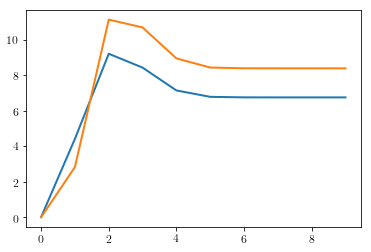

In [756]:
plt.plot(A[5][0])
plt.plot(A[6][4])
plt.show()



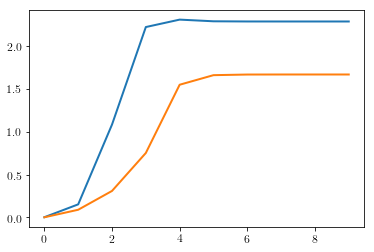

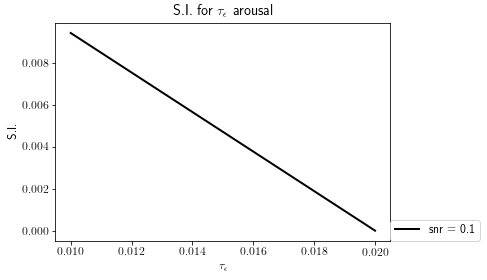

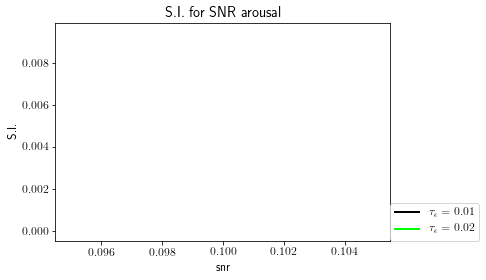

In [627]:
snr = ["0.1","0.15","0.2","0.25","0.5"]
ndt = ["0.01","0.02"]#,"0.03","0.04","0.05","0.06","0.07","0.08","0.09","0.12","0.14","0.16","0.18","0.2"]

A=np.array([[rect(np.array(utils.fetch_file("./model_files/MGSM_model_file_3/tcornoise_{}_signal_tau_0.1responses_0.5_100_{}_size_tuning_0.01.pkl".format(n,k)))[0,:,0]) for n in ndt] for k in snr])

plt.plot(A[0,0])
plt.plot(A[0,1])
plt.show()

sis = np.array([[SI(x) for x in a] for a in A])

snrcol = np.linspace(0,1,sis.shape[0])
for k in range(len(sis)):
    plt.plot([float(x) for x in ndt],sis[k],label = "snr = {}".format(snr[k]),color = (0,snrcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for $\\tau_{\epsilon}$ arousal")
plt.xlabel("\\tau_{\epsilon}")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/MGSM_SI_ndt.pdf")
plt.show()

ndtcol = np.linspace(0,1,sis.shape[1])
for k in range(sis.shape[1]):
    plt.plot([float(x) for x in snr],sis[:,k],label = "$\\tau_\epsilon = {}$".format(ndt[k]),color = (0,ndtcol[k],0))
plt.legend(loc = (1,0))
plt.title("S.I. for SNR arousal")
plt.xlabel("snr")
plt.ylabel("S.I.")
plt.savefig("ATT_full_model_test_figures/MGSM_SI_snr.pdf")
plt.show()



In [315]:
900/60./60.

0.25

In [413]:
t0 = .1

def tau(b,u):
    return - 2 * t0 /(np.log(1 - u*u*np.exp(b)))

def snr(b):
    return np.exp(b/2)

In [414]:
def U(b,u):
    return (1 - np.exp(-2*t0/tau(b,u)))/(snr(b)**2)

/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


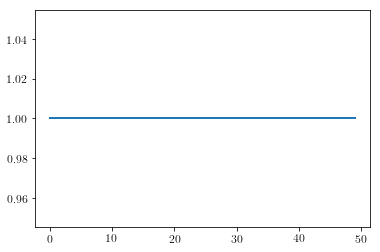

In [417]:
plt.plot([U(b,1) for b in np.linspace(-2,2,100)])
plt.show()

(1, 2500, 2)
(2500,)


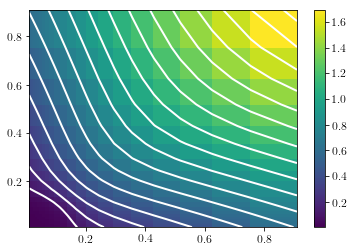

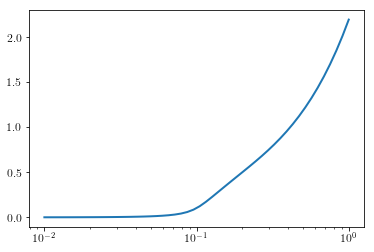

In [1004]:
#R=np.array(utils.fetch_file("./model_files/model_file_16/signal_tau_1.0TA_responses_0.5_1_{}_COS_rot_0.01.pkl".format("0.75")))
R=np.array(utils.fetch_file("./model_files/model_file_18/responses_0.5_1_0.75_COS_rot_1.0.pkl"))
print(R.shape)
R = R[0]

#R = np.mean(R,axis = 0,keepdims = True)
R = rect(R[:,0])**2 + rect(R[:,1])**2

print(R.shape)
R = np.reshape(R,[50,50])

C = np.logspace(-2,0,50)
#C = np.linspace(0,1,10)

RT = (R + R.transpose())/2

l = np.linspace(np.min(RT),np.max(RT),20)
#l = [.01,.02,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]

c = plt.pcolor(C[::2],C[::2],RT[::2,::2])
plt.contour(C[::2],C[::2],RT[::2,::2],colors = [(1,1,1) for a in l],levels = l)

#c = plt.pcolor(C,C,R)
#plt.contour(C,C,R,colors = [(1,1,1) for a in l],levels = l)

plt.colorbar(c)

#plt.xlim([.01,.1])
#plt.ylim([.01,.1])

#plt.xscale("log")
#plt.yscale("log")

plt.show()
plt.plot(C,np.diag(R))
plt.xscale("log")
plt.show()

(1, 400, 2)
(400,)


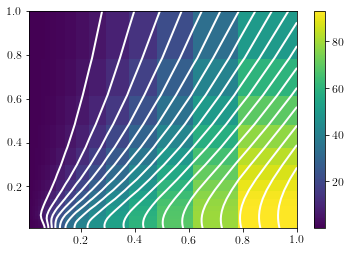

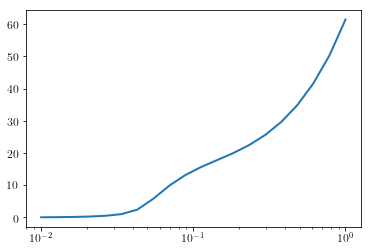

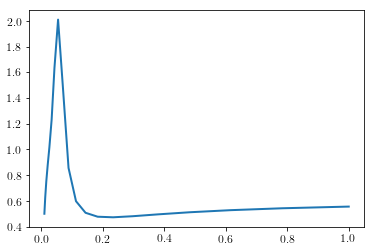

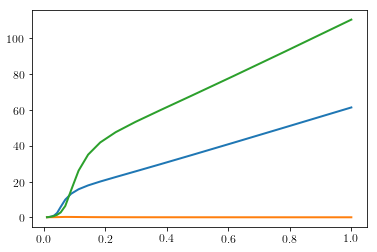

In [988]:

#R=np.array(utils.fetch_file("./model_files/model_file_16/signal_tau_1.0TA_responses_0.5_1_{}_COS_rot_0.01.pkl".format("0.75")))
R=np.array(utils.fetch_file("./model_files/model_file_18/responses_0.5_1_2.0_COS_1.0.pkl"))
print(R.shape)
R = R[0]

#R = np.mean(R,axis = 0,keepdims = True)
R = rect(R[:,0])**2 + rect(R[:,1])**2

print(R.shape)
R = np.reshape(R,[20,20])

C = np.logspace(-2,0,20)
#C = np.linspace(0,1,10)

RT = (R + R.transpose())/2

l = np.linspace(np.min(R),np.max(R),20)
#l = [.01,.02,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]

c = plt.pcolor(C,C,R)
plt.contour(C,C,R,colors = [(1,1,1) for a in l],levels = l)

#c = plt.pcolor(C,C,R)
#plt.contour(C,C,R,colors = [(1,1,1) for a in l],levels = l)

plt.colorbar(c)

#plt.xlim([.01,.1])
#plt.ylim([.01,.1])

#plt.xscale("log")
#plt.yscale("log")

plt.show()
plt.plot(C,np.diag(R))
plt.xscale("log")
plt.show()

plt.plot(C,np.diag(R)/(R[:,0] + R[0,:]))
plt.show()

plt.plot(C,np.diag(R))
plt.plot(C,R[:,0])
plt.plot(C,R[0,:])
plt.show()

(1, 20, 2)


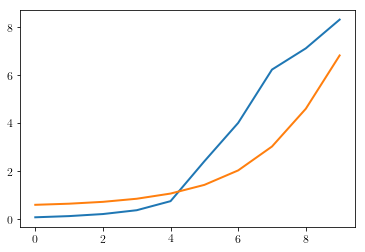

In [996]:
R1=np.array(utils.fetch_file("./model_files/MGSM_model_file_3/responses_0.5_2_1.0_surround_suppression_1.0.pkl"))
print(R1.shape)
R1 = np.reshape(R1[0],[10,2,-1])

#R = np.mean(R,axis = 0,keepdims = True)
R1 = np.sqrt(rect(R1[:,:,0])**2 + rect(R1[:,:,1])**2)
plt.plot(R1[:,0])
plt.plot(R1[:,1])
plt.show()

(1, 50, 2)
(1, 50)


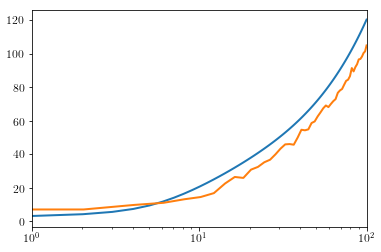

In [943]:
R1t=np.array(utils.fetch_file("./model_files/model_file_18/TA_responses_0.5_1_0.75_CRF_1.0.pkl"))
R1=np.array(utils.fetch_file("./model_files/model_file_16/responses_0.5_1_0.75_CRF_1.0.pkl"))

R1 = R1[0]
R1t = R1t[:,0]
R1t=np.mean(R1t,axis = 0,keepdims = True)
print(R1t.shape)


R1t = rect(R1t[:,:,0])**2 + rect(R1t[:,:,1])**2
R1 = rect(R1[:,0])**2 + rect(R1[:,1])**2
print(R1t.shape)
R1t = np.mean(R1t,axis = 0)


C = np.linspace(0,100,R1.shape[0])
Ct = np.linspace(0,100,R1t.shape[0])

plt.plot(C,R1)
plt.plot(Ct,R1t)

plt.xlim([1,100])
plt.xscale("log")
plt.show()